# Table of Contents
 <p><div class="lev1"><a href="#Applying-MENTOS-to-the-ABC-model"><span class="toc-item-num">1&nbsp;&nbsp;</span>Applying MENTOS to the ABC model</a></div><div class="lev2"><a href="#From-chemical-potential-to-standard-free-energy-of-the-reaction"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>From chemical potential to standard free energy of the reaction</a></div><div class="lev2"><a href="#Function-definitions-for-reporting-on-the-ABC-model"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Function definitions for reporting on the ABC model</a></div><div class="lev1"><a href="#Convex-problem-formulation-for-MENTOS"><span class="toc-item-num">2&nbsp;&nbsp;</span>Convex problem formulation for MENTOS</a></div><div class="lev2"><a href="#Predicting-steady-state-fluxes-of-the-ABC-model"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Predicting steady state fluxes of the ABC model</a></div><div class="lev2"><a href="#Minimizing-log-likelihoods-of-the-ABC-model"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Minimizing log likelihoods of the ABC model</a></div><div class="lev2"><a href="#maximizing-entropy-of-the-log-likelihoods-of-the-ABC-model"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>maximizing entropy of the log likelihoods of the ABC model</a></div><div class="lev2"><a href="#Compute-the-reaction-bounds-from-the-likelihoods"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Compute the reaction bounds from the likelihoods</a></div><div class="lev2"><a href="#Computing-the-forward-and-reverse-rates-from-the-likelihood-and-the-flux"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Computing the forward and reverse rates from the likelihood and the flux</a></div><div class="lev1"><a href="#Nonconvex-formulations-of-MENTOS"><span class="toc-item-num">3&nbsp;&nbsp;</span>Nonconvex formulations of MENTOS</a></div><div class="lev2"><a href="#Maximize-entropy-production-for-the-ABC-model"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Maximize entropy production for the ABC model</a></div><div class="lev2"><a href="#Minimize-entropy-production-for-the-ABC-model"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Minimize entropy production for the ABC model</a></div><div class="lev2"><a href="#Maximize-microscopic-entropy-production-net-flux-difference-for-the-ABC-model"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Maximize microscopic entropy production net flux difference for the ABC model</a></div><div class="lev2"><a href="#Maximize-microscopic-entropy-production-net-flux-for-the-ABC-model"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Maximize microscopic entropy production net flux for the ABC model</a></div><div class="lev2"><a href="#Maximize-microscopic-entropy-production-rate-for-the-ABC-model"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Maximize microscopic entropy production rate for the ABC model</a></div><div class="lev2"><a href="#Maximize-macroscopic-entropy-production-net-flux-for-the-ABC-model"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Maximize macroscopic entropy production net flux for the ABC model</a></div><div class="lev2"><a href="#Maximize-macroscopic-entropy-production-net-flux-difference-for-the-ABC-model"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Maximize macroscopic entropy production net flux difference for the ABC model</a></div><div class="lev1"><a href="#Comparing-the-predictions-of-alternative-objective-functions"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparing the predictions of alternative objective functions</a></div>

# Applying MENTOS to the ABC model #


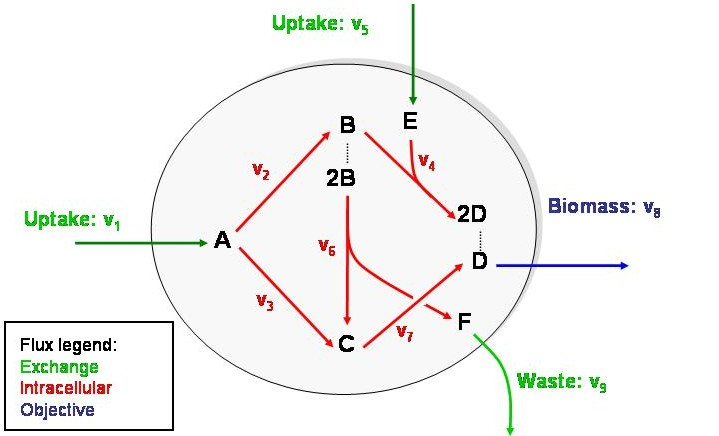

In [51]:
%reload_ext autoreload
%aimport  mentos 
%autoreload 1
from IPython.display import Image, display
import sys
import pandas as pd
Image('Metabolic-network.JPG')

The chemical equations for the ABC model are:

$$
\begin{eqnarray}
 A_{ext} & \overset{\overset{+1}{\rightharpoonup}}{\underset{-1}{\leftharpoondown}} & A \\
  A & \overset{\overset{+2}{\rightharpoonup}}{\underset{-2}{\leftharpoondown}} & B \\
 A & \overset{\overset{+3}{\rightharpoonup}}{\underset{-3}{\leftharpoondown}} & C \\
 B + E & \overset{\overset{+4}{\rightharpoonup}}{\underset{-4}{\leftharpoondown}}& 2D\\
 E_{ext} & \overset{\overset{+5}{\rightharpoonup}}{\underset{-5}{\leftharpoondown}} & E \\
 2B & \overset{\overset{+6}{\rightharpoonup}}{\underset{-6}{\leftharpoondown}} & C + F \\
 C &\overset{\overset{+7}{\rightharpoonup}}{\underset{-7}{\leftharpoondown}} & D \\
 D & \overset{\overset{+8}{\rightharpoonup}}{\underset{-8}{\leftharpoondown}}& D_{ext} \\
 F &\overset{\overset{+9}{\rightharpoonup}}{\underset{-9}{\leftharpoondown}} & F_{ext} \\
\end{eqnarray}
$$
 which can be represented as a Stoichiometric matrix $S_{full}$:
 
$$
S_{full} = \left[ {\begin{array}{cccccccccc}
  & R_1 & R_2 & R_3 & R_4 & R_5 & R_6 & R_7 & R_8 & R_9 \\
A & 1   & -1  & -1  & 0   & 0   & 0   & 0   & 0   & 0   \\
B & 0   &  1  & 0   & -1  & 0   & -2  & 0   & 0   & 0   \\
C & 0   &  0  & 1   & 0   & 0   & 1   & -1  & 0   & 0   \\
D & 0   &  0  & 0   & 2   & 0   & 0   &  1  & -1  & 0   \\
E & 0   &  0  & 0   & -1   & 1   & 0   &  0  & 0  & 0   \\
F & 0   &  0  & 0   &  0   & 0   & 1   &  0  & 0  & -1   \\
A_{ext} & -1  & 0  & 0  & 0   & 0   & 0   & 0   & 0   & 0   \\
E_{ext} & 0   & 0  & 0  & 0   & -1   & 0   & 0   & 0   & 0   \\
D_{ext} & 0   & 0  & 0  & 0   & 0   & 0   & 0   & 1   & 0   \\
F_{ext} & 0   & 0  & 0  & 0   & 0   & 0   & 0   & 0   & 1   \\
\end{array}}\right]
$$



In [52]:
import escher,os
import cobra
abc_model = cobra.Model('ABC_model')
M = {}
A_ext = cobra.Metabolite('A_ext', compartment='ext')
E_ext = cobra.Metabolite('E_ext', compartment= 'ext')
D_ext = cobra.Metabolite('D_ext', compartment='ext')
F_ext = cobra.Metabolite('F_ext', compartment='ext')
A = cobra.Metabolite('A',compartment='c')
B  = cobra.Metabolite('B',compartment='c')
C  = cobra.Metabolite('C',compartment='c')
D = cobra.Metabolite('D',compartment='c')
E  = cobra.Metabolite('E',compartment='c')
F  = cobra.Metabolite('F',compartment='c')
R_1 = cobra.Reaction('R_1')
R_2 = cobra.Reaction('R_2')
R_3 = cobra.Reaction('R_3')
R_4 = cobra.Reaction('R_4')
R_5 = cobra.Reaction('R_5')
R_6 = cobra.Reaction('R_6')
R_7 = cobra.Reaction('R_7')
R_8 = cobra.Reaction('R_8')
R_9 = cobra.Reaction('R_9')

R_1.add_metabolites({A_ext: -1, A: 1})
R_2.add_metabolites({A:-1, B:1})
R_3.add_metabolites({A:-1, C:1})
R_4.add_metabolites({B:-1, E:-1, D:2})
R_5.add_metabolites({E_ext:-1, E:1})
R_6.add_metabolites({B:-2, C:1,F:1})
R_7.add_metabolites({C:-1,D:1})
R_8.add_metabolites({D:-1, D_ext:1})
R_9.add_metabolites({F:-1, F_ext: 1})

abc_model.add_reactions([R_1, R_2, R_3, R_4, R_5, R_6, R_7, R_8, R_9])
cobra.io.save_json_model(abc_model, 'Mentos/ABC_model.json')
cobra.io.write_sbml_model(abc_model, 'Mentos/ABC_model.sbml')
abc_json = cobra.io.to_json(abc_model)

In [53]:
abc_array = abc_model.to_array_based_model()
abc_array.S

<10x9 sparse matrix of type '<type 'numpy.float64'>'
	with 20 stored elements in LInked List format>

In [54]:
sys.path.append('')
mets = ['A','B','C','D','E','F','A_ext', 'D_ext', 'E_ext','F_ext']
internal_mets = [m for m in mets if 'ext' not in m]
rxns = ['R_{}'.format(i) for i in range(1,10)]

data = {'R_1': pd.Series({'A':1, 'A_ext': -1}),
       'R_2': pd.Series({'A':-1,'B':1}),
       'R_3': pd.Series({'A':-1,'C':1}),
       'R_4': pd.Series({'B':-1, 'D': 2, 'E': -1}),
       'R_5': pd.Series({'E':1, 'E_ext':-1}),
       'R_6': pd.Series({'B':-2, 'C':1, 'F': 1}),
       'R_7': pd.Series({'C':-1, 'D':1}),
       'R_8': pd.Series({'D': -1, 'D_ext': 1}),
       'R_9': pd.Series({'F':-1, 'F_ext':1})}
fullS = pd.DataFrame(data, columns=rxns, index=mets,dtype='int64').fillna(0)

biomass = fullS.columns.get_loc('R_8')
A_uptake = 0
E_uptake = 4
R = 8.3144598/1000.0 # ideal gas constant
T = 298.15           # standard temperature
n_A = 6.022e23       # Avogadro's number
V = 1e-15            # volume of cell in Liters
c_L = 1e-8           # lower bound of metabolite concentrations
c_U = 1e-3           # upper bound of metabolite concentrations
v_L = -100
v_U = 100
A_ext = 6            # Index of A_ext
E_ext = 8            # Index of E_ext
D_ext = 7            # Index of D_ext
F_ext = 9            # Index of F_ext
A,B,C,D,E,F = range(6)
lambda_x = 0.5
S = fullS.loc[internal_mets].as_matrix() 

m,n = fullS.shape

metab = {}
reactions = {}
true_metab, true_reactions = {},{}
display(fullS)



,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9
A,1,-1,-1,0,0,0,0,0,0
B,0,1,0,-1,0,-2,0,0,0
C,0,0,1,0,0,1,-1,0,0
D,0,0,0,2,0,0,1,-1,0
E,0,0,0,-1,1,0,0,0,0
F,0,0,0,0,0,1,0,0,-1
A_ext,-1,0,0,0,0,0,0,0,0
D_ext,0,0,0,0,0,0,0,1,0
E_ext,0,0,0,0,-1,0,0,0,0
F_ext,0,0,0,0,0,0,0,0,1


 How do we predict  metabolite concentrations?  First we need to to obtain the chemical potential for each metabolite.

##  From chemical potential to standard free energy of the reaction ##


Chemical potential $\vec{\mu}^0$ is the Gibbs energy of formation $\Delta G^0_+$ for each metabolite:
$$
\vec{\mu}^0 = \Delta \vec{G^0_+} = \left[ {\begin{array}{cc}
A & 4 \\
B & 2 \\
C & 2 \\
D & 0 \\
E & 2 \\
F & 1 \\
\end{array}}\right]
$$

Which implies a Change in Standard Gibbs free energy $S^T\vec{\mu}^0 = \Delta G^0$ for each reaction:
$$
\Delta \vec{G}^0 = \left[ {\begin{array}{cc}
R_1 & 0 \\
R_2 & -2 \\
R_3 & -2 \\
R_4 & -4 \\
R_5 & 0 \\
R_6 & -1 \\
R_7 & -2 \\
R_8 & 0 \\
R_9 & 0 \\
\end{array}}\right]
$$



In [67]:
mu0 = pd.Series([4.0,2,2,0,2,1,4,0,2,1], index=mets,dtype='float64')
display(pd.DataFrame(mu0,columns=['$\mu^0$']))
deltaG0 = fullS.T.dot(mu0)
display(pd.DataFrame(deltaG0,columns=['$\Delta G^0$']))

,$\mu^0$
A,4
B,2
C,2
D,0
E,2
F,1
A_ext,4
D_ext,0
E_ext,2
F_ext,1


,$\Delta G^0$
R_1,0
R_2,-2
R_3,-2
R_4,-4
R_5,0
R_6,-1
R_7,-2
R_8,0
R_9,0


## Function definitions for reporting on the ABC model ##

In [57]:
import pyOpt
from scipy.stats import entropy
import numpy as np
import cvxpy as cvx
import pandas as pd
import numpy as np
import sys, cobra
from IPython.display import display, HTML
#import pandas.core.format as fmt
pd.options.display.float_format = '{:.3g}'.format 
#pd.options.display.float_+ormat = '{:.0f}'.format

pd.options.display.float_format = '{:.3g}'.format

# Convex problem formulation for MENTOS #


## Predicting steady state fluxes of the ABC model##
Steady-state fluxes can be predicted from flux balance analysis:

$$\begin{array}{ll}
    \underset{\vec{\bf v}}{\mbox{maximize}}   & v_{biomass} \\
    \mbox{subject to}  & S\cdot v = 0 \\
    & 0 \leq v \leq v_{upper} \\
\end{array}$$



In [58]:
v = cvx.Variable(n)
obj = cvx.Maximize(v[biomass])
constraints = [S*v == 0,
              0 <= v,
              v <= v_U]
prob = cvx.Problem(obj, constraints)
prob.solve(verbose=True)
v.value


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -7.391e+01  -1.292e+03  +1e+03  6e-05  4e-09  1e+00  6e+01    ---    ---    1  1  - |  -  - 
 1  -8.670e+01  -2.376e+02  +2e+02  7e-06  4e-07  3e-01  8e+00  0.8790  3e-03   0  0  0 |  0  0
 2  -9.987e+01  -1.100e+02  +1e+01  5e-07  7e-07  2e-01  5e-01  0.9525  2e-02   0  0  0 |  0  0
 3  -1.000e+02  -1.001e+02  +1e-01  5e-09  1e-08  2e-03  6e-03  0.9890  1e-04   0  0  0 |  0  0
 4  -1.000e+02  -1.000e+02  +1e-03  6e-11  2e-10  2e-05  7e-05  0.9890  1e-04   1  0  0 |  0  0
 5  -1.000e+02  -1.000e+02  +1e-05  6e-13  1e-11  3e-07  7e-07  0.9890  1e-04   1  0  0 |  0  0
 6  -1.000e+02  -1.000e+02  +2e-07  7e-15  4e-13  3e-09  8e-09  0.9890  1e-04   1  0  0 |  0  0

OPTIMAL (within feastol=4.4e-13, reltol=1.5e-09, abstol=1.5e-07).
Runtime: 0.002303 seconds.



matrix([[ 83.72371537],
        [ 63.84348529],
        [ 19.88023008],
        [ 32.13201818],
        [ 32.13201818],
        [ 15.85573356],
        [ 35.73596364],
        [100.        ],
        [ 15.85573356]])

## Minimizing log likelihoods of the ABC model ##
At steady state, the log likelihood is equal to the difference of the logs of the equilibrium constant $K$ and the mass action ratio $Q$, subject to the boundary conditions

$$\begin{array}{ll}
    \underset{\log\vec{\bf L}_+, \log\vec{\bf c}}{\mbox{minimize}}   & \|\log L_+\|_{2} \\
    \mbox{subject to}  &  \log L_+ = \log K_{eq} - \log Q_r \\
    & \log [A_{ext}] = \log c_{upper} \\
    & \log [E_{ext}] = \log c_{upper} \\
    & \log [D_{ext}] = \log c_{lower} \\
    & \log [F_{ext}] = \log c_{lower} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_A \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_B \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_C \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_D \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_E \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_F \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
\end{array}$$

Where,

$$\begin{eqnarray}
L_+ & = & \frac{r_+}{r_-} \\
\log K_{eq} & = & -\frac{1}{RT}S^T\cdot\mu^0 \\
\log Q_r & = & S^T\cdot\log c \\
\mu & = & RT\log c + \mu^0 \\
\end{eqnarray}$$

In [59]:


log_c = cvx.Variable(m)                                     # log of the concentrations
log_likelihood = cvx.Variable(n)

log_Q = fullS.as_matrix().T*log_c                              # log of the Reaction quotient
log_K = cvx.Constant(-1.0/(R*T)*deltaG0.as_matrix())           # log of the Equilibrium constnat
mu = R*T*log_c + mu0.values

#obj = cvx.Maximize(cvx.sum_entries(cvx.entr(log_likelihood)))  # entropy of the log likelihoods
obj  = cvx.Minimize(cvx.norm2(log_likelihood))
constraints = [
              log_c[A_ext] == cvx.log(c_U),             # Creating a concentration gradient between A, E and D,F
              log_c[E_ext] == cvx.log(c_U),
              log_c[D_ext] == cvx.log(c_L),
              log_c[F_ext] == cvx.log(c_L),
    
              log_likelihood == log_K - log_Q,          # Thermodynamic constraint
    
              mu[A] >= mu[D_ext] + mu[F_ext],           # Energy sink constraint
              mu[B] >= mu[D_ext] + mu[F_ext],
              mu[C] >= mu[D_ext] + mu[F_ext],
              mu[D] >= mu[D_ext] + mu[F_ext],
              mu[E] >= mu[D_ext] + mu[F_ext],
              mu[F] >= mu[D_ext] + mu[F_ext],
    
              mu[A] <= mu[A_ext] + mu[E_ext],           # Energy barrier constraint
              mu[B] <= mu[A_ext] + mu[E_ext],
              mu[C] <= mu[A_ext] + mu[E_ext],
              mu[D] <= mu[A_ext] + mu[E_ext],
              mu[E] <= mu[A_ext] + mu[E_ext],
              mu[F] <= mu[A_ext] + mu[E_ext],  
              ]
prob = cvx.Problem(obj, constraints)
prob.solve( verbose=True)
display(pd.DataFrame({'$\log c$':np.squeeze(np.asarray(log_c.value))},index=mets))
display(pd.DataFrame({'$\log L_+$':np.squeeze(np.asarray(log_likelihood.value))},index=rxns))


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -1.905e+01  +3e+02  8e-02  9e-01  1e+00  2e+01    ---    ---    1  1  - |  -  - 
 1  +2.217e+01  +2.141e+01  +5e+01  1e-02  1e-01  2e+00  4e+00  0.9316  1e-01   1  1  1 |  0  0
 2  +1.067e+01  +1.053e+01  +1e+01  3e-03  2e-02  5e-01  9e-01  0.7978  3e-02   1  1  1 |  0  0
 3  +1.243e+01  +1.235e+01  +1e+01  2e-03  2e-02  4e-01  7e-01  0.4921  6e-01   1  1  1 |  0  0
 4  +1.015e+01  +1.014e+01  +1e+00  3e-04  2e-03  6e-02  9e-02  0.9113  4e-02   1  1  1 |  0  0
 5  +1.017e+01  +1.017e+01  +2e-01  4e-05  3e-04  9e-03  1e-02  0.9283  8e-02   1  1  1 |  0  0
 6  +1.015e+01  +1.015e+01  +2e-03  4e-07  4e-06  1e-04  2e-04  0.9890  1e-04   1  1  1 |  0  0
 7  +1.015e+01  +1.015e+01  +2e-05  5e-09  4e-08  1e-06  2e-06  0.9890  1e-04   1  1  1 |  0  0
 8  +1.015e+01  +1.015e+01  +2e-07  5e-11  5e-

,$\log c$
A,-13
B,-15.2
C,-13
D,-13.7
E,-12.2
F,-17.7
A_ext,-6.91
D_ext,-18.4
E_ext,-6.91
F_ext,-18.4


,$\log L_+$
R_1,6.1
R_2,3.01
R_3,0.803
R_4,1.61
R_5,5.29
R_6,0.702
R_7,1.51
R_8,4.72
R_9,0.702


In [60]:
import escher,os
abc_dir = 'Mentos/ABC'
map_name = os.path.join(abc_dir,'ABC_map.json')
model_name = os.path.join(abc_dir,'ABC_model.json')
reaction_data = dict([(rxns[i], R*T*log_likelihood[i].value) for i in range(len(rxns))])
metabolite_data = (mu0 + R*T*np.squeeze(np.asarray(log_c.value))).to_dict()
builder = escher.Builder(map_json=map_name, model_json=model_name, 
                         reaction_data=reaction_data, metabolite_data=metabolite_data)
builder.display_in_notebook(menu='zoom')

## maximizing entropy of the log likelihoods of the ABC model ##
At steady state, the log likelihood is equal to the difference of the logs of the equilibrium constant $K$ and the mass action ratio $Q$, subject to the boundary conditions

$$\begin{array}{ll}
    \underset{\log\vec{\bf L}_+, \log\vec{\bf c}}{\mbox{minimize}}   & \sum_j \text{entropy}(\log L_+) \\
    \mbox{subject to}  &  \log L_+ = \log K_{eq} - \log Q_r \\
    & \log [A_{ext}] = \log c_{upper} \\
    & \log [E_{ext}] = \log c_{upper} \\
    & \log [D_{ext}] = \log c_{lower} \\
    & \log [F_{ext}] = \log c_{lower} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_A \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_B \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_C \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_D \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_E \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_F \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
\end{array}$$

Where,

$$\begin{eqnarray}
L_+ & = & \frac{r_+}{r_-} \\
\log K_{eq} & = & -\frac{1}{RT}S^T\cdot\mu^0 \\
\log Q_r & = & S^T\cdot\log c \\
\mu & = & RT\log c + \mu^0 \\
\end{eqnarray}$$

In [61]:


log_c = cvx.Variable(m)                                     # log of the concentrations
log_likelihood = cvx.Variable(n)

log_Q = fullS.as_matrix().T*log_c                              # log of the Reaction quotient
log_K = cvx.Constant(-1.0/(R*T)*deltaG0.as_matrix())           # log of the Equilibrium constnat
mu = R*T*log_c + mu0.values

obj = cvx.Maximize(cvx.sum_entries(cvx.entr(log_likelihood)))  # entropy of the log likelihoods
#obj  = cvx.Minimize(cvx.norm1(log_likelihood))
constraints = [
              log_c[A_ext] == cvx.log(c_U),             # Creating a concentration gradient between A, E and D,F
              log_c[E_ext] == cvx.log(c_U),
              log_c[D_ext] == cvx.log(c_L),
              log_c[F_ext] == cvx.log(c_L),
    
              log_likelihood == log_K - log_Q,          # Thermodynamic constraint
    
              mu[A] >= mu[D_ext] + mu[F_ext],           # Energy sink constraint
              mu[B] >= mu[D_ext] + mu[F_ext],
              mu[C] >= mu[D_ext] + mu[F_ext],
              mu[D] >= mu[D_ext] + mu[F_ext],
              mu[E] >= mu[D_ext] + mu[F_ext],
              mu[F] >= mu[D_ext] + mu[F_ext],
    
              mu[A] <= mu[A_ext] + mu[E_ext],           # Energy barrier constraint
              mu[B] <= mu[A_ext] + mu[E_ext],
              mu[C] <= mu[A_ext] + mu[E_ext],
              mu[D] <= mu[A_ext] + mu[E_ext],
              mu[E] <= mu[A_ext] + mu[E_ext],
              mu[F] <= mu[A_ext] + mu[E_ext],  
              ]
prob = cvx.Problem(obj, constraints)
prob.solve( verbose=True)
display(pd.DataFrame({'$\log c$':np.squeeze(np.asarray(log_c.value))},index=mets))
display(pd.DataFrame({'$\log L_+$':np.squeeze(np.asarray(log_likelihood.value))},index=rxns))


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -2.491e+01  +4e+01  1e+00  1e+00  1e+00  1e+00    ---    ---    0  0  - |  -  - 
 1  +3.747e+01  +1.658e+01  +1e+01  8e-01  1e+00  2e+00  3e-01  0.6740  2e-02   1  1  1 |  0  1
 2  +7.417e+01  +6.189e+01  +5e+00  5e-01  8e-01  4e+00  1e-01  0.7635  1e-01   1  1  1 |  1  0
 3  +6.004e+01  +5.326e+01  +2e+00  3e-01  5e-01  2e+00  6e-02  0.6266  1e-01   1  1  1 |  1  2
 4  +3.342e+01  +3.141e+01  +6e-01  8e-02  2e-01  5e-01  2e-02  0.8209  1e-01   1  1  1 |  1  0
 5  +3.293e+01  +3.231e+01  +2e-01  3e-02  5e-02  2e-01  4e-03  0.7833  1e-01   1  1  1 |  1  1
 6  +3.177e+01  +3.151e+01  +7e-02  1e-02  2e-02  1e-01  2e-03  0.9791  4e-01   1  1  1 |  6  0
 7  +3.102e+01  +3.096e+01  +2e-02  3e-03  6e-03  3e-02  5e-04  0.7833  5e-02   1  1  1 |  2  1
 8  +3.082e+01  +3.080e+01  +5e-03  8e-04  2e-

,$\log c$
A,-13
B,-15.1
C,-12.8
D,-13.2
E,-12.2
F,-17.7
A_ext,-6.91
D_ext,-18.4
E_ext,-6.91
F_ext,-18.4


,$\log L_+$
R_1,6.1
R_2,2.9
R_3,0.621
R_4,0.762
R_5,5.29
R_6,0.718
R_7,1.21
R_8,5.19
R_9,0.718


In [62]:
import escher,os
abc_dir = 'Mentos/ABC'
map_name = os.path.join(abc_dir,'ABC_map.json')
model_name = os.path.join(abc_dir,'ABC_model.json')
reaction_data = dict([(rxns[i], R*T*log_likelihood[i].value) for i in range(len(rxns))])
metabolite_data = (mu0 + R*T*np.squeeze(np.asarray(log_c.value))).to_dict()
builder = escher.Builder(map_json=map_name, model_json=model_name, 
                         reaction_data=reaction_data, metabolite_data=metabolite_data)
builder.display_in_notebook(menu='zoom')

## Compute the reaction bounds from the likelihoods ##

In [63]:
v_L, v_U = mentos.get_rxn_bounds_from_log_likelihood( np.squeeze(np.asarray(log_likelihood.value)))
v_L, v_U

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 445.28785722,   17.23116929,    0.86009883,    1.14167213,
         198.17282328,    1.05085328,    2.35929172,  179.04086706,
           1.05085395]))

In [64]:
v = cvx.Variable(n)
obj = cvx.Maximize(v[biomass])
constraints = [S*v == 0,
              v_L <= v,
              v <= v_U]
prob = cvx.Problem(obj, constraints)
prob.solve(verbose=True)
v.value


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -1.229e+02  -1.198e+03  +2e+03  2e-01  4e-09  1e+00  1e+02    ---    ---    1  1  - |  -  - 
 1  +3.914e+01  -8.020e+02  +1e+03  2e-01  2e-06  5e+01  6e+01  0.7453  4e-01   0  0  0 |  0  0
 2  +2.297e-01  -4.242e+01  +7e+01  9e-03  2e-07  2e+00  4e+00  0.9414  6e-03   0  0  0 |  0  0
 3  -2.076e+00  -1.080e+01  +3e+01  1e-03  9e-08  8e-01  2e+00  0.6663  1e-01   0  0  0 |  0  0
 4  -3.816e+00  -6.570e+00  +1e+01  4e-04  5e-08  3e-01  6e-01  0.6977  6e-02   0  0  0 |  0  0
 5  -4.175e+00  -4.715e+00  +2e+00  8e-05  2e-08  5e-02  1e-01  0.8793  9e-02   0  0  0 |  0  0
 6  -4.194e+00  -4.204e+00  +4e-02  2e-06  1e-09  1e-03  2e-03  0.9820  1e-03   0  0  0 |  0  0
 7  -4.194e+00  -4.194e+00  +4e-04  2e-08  3e-11  1e-05  2e-05  0.9890  1e-04   0  0  0 |  0  0
 8  -4.194e+00  -4.194e+00  +4e-05  2e-09  8e-

matrix([[ 4.10347751],
        [ 3.24337869],
        [ 0.86009883],
        [ 1.14167213],
        [ 1.14167213],
        [ 1.05085328],
        [ 1.9109521 ],
        [ 4.19429636],
        [ 1.05085328]])

## Computing the forward and reverse rates from the likelihood and the flux ##
From the definition of forward likelihood and net flux:

$$\begin{eqnarray}
L_+ &=& \frac{r_{+}}{r_{-}} \\
v &=& r_{+} - r_{-} \\
\end{eqnarray}$$

We can solve for the forward reaction rates $r_{+}$ and $r_{-}$:
$$\begin{eqnarray}
r_{-} & = & \frac{r_{+}}{L_+} \\
 r_{+}  - r_{-} & = & v\\
 r_{+} - \frac{r_{+}}{L_+} & = & v \\
r_{+}(1 -\frac{1}{L_+}) & = & v \\
r_{+} & = & \frac{v}{1-\frac{1}{L_+}} \\
       & = & \frac{L_+v}{L_+ - 1} \\
r_{-} & = & \frac{v}{L_+ - 1}  \\
\end{eqnarray}$$


In [65]:
net_flux = np.squeeze(np.asarray(v.value))
forward_likelihood = np.exp(np.squeeze(np.asarray(log_likelihood.value)))
net_flux, forward_likelihood
forward_rate = net_flux*forward_likelihood/(forward_likelihood - 1)
backward_rate = net_flux/(forward_likelihood - 1)
forward_rate - backward_rate

array([ 4.10347751,  3.24337869,  0.86009883,  1.14167213,  1.14167213,
        1.05085328,  1.9109521 ,  4.19429636,  1.05085328])


Let $r_+ = v(N+1)$ and $r_- = vN$.  By definition, the thermodynamic likelihood is equal to ratio of the forward and backward rates, so

$$\begin{eqnarray}
\frac{r_+}{r_-} & = & \frac{v(N+1)}{vN} \\
& = & \frac{N+1}{N} \\
& = & 1 + \frac{1}{N}
\end{eqnarray}$$

The thermodynamic constraint at steady state is

$$\begin{eqnarray}
 -\frac{1}{RT}S^T\mu^0 -S^T\log a & = & \log \frac{r_+}{r_-}  \\
 & = & \log \frac{N+1}{N} \\
 \end{eqnarray}$$

In [86]:
reload( mentos)
metab['convex_mentos'] = mentos.generate_metabolite_report( np.squeeze(np.asarray(log_c.value))
                                                             , forward_rate, backward_rate, S, mets, internal_mets, 
                                                             mu0).astype(np.float64)
metab['convex_mentos']['Chemical potential'].to_csv('Mentos/ABC_chemical_potentials.csv',header=True)

true_metab['convex_mentos']= pd.read_csv('ABC_metab_convex_mentos.csv',index_col=0).astype(np.float64)
pd.testing.assert_frame_equal(true_metab['convex_mentos'], metab['convex_mentos'])

mentos.compare_frames(true_metab['convex_mentos'].astype(np.float64),metab['convex_mentos'])

,A,B,C,D,E,F,A_ext,D_ext,E_ext,F_ext
Counts,1.35e+03,165,1.62e+03,1.08e+03,3.02e+03,12,6.02e+05,6,6.02e+05,6
Concentrations,2.24e-06,2.75e-07,2.7e-06,1.8e-06,5.02e-06,2.05e-08,0.001,1e-08,0.001,1e-08
Log Concentrations,-13,-15.1,-12.8,-13.2,-12.2,-17.7,-6.91,-18.4,-6.91,-18.4
Standard Chemical potential,4,2,2,0,2,1,4,0,2,1
Chemical potential,-28.2,-35.4,-29.8,-32.8,-28.2,-42.9,-13.1,-45.7,-15.1,-44.7
S*forward_rate,-1.18,-2.81,1.19,2.79,-0.994,6.4e-07,nan,nan,nan,nan
S*backward_rate,-1.18,-2.81,1.19,2.79,-0.994,6.43e-07,nan,nan,nan,nan
S*net_flux,-8.88e-16,-3.55e-15,2.06e-11,4.11e-11,-3.55e-15,-2.4e-09,nan,nan,nan,nan


In [76]:
reactions['convex_mentos'] = mentos.generate_rxn_report(mets, log_c, log_Q.value, log_K.value,
                                                         forward_rate, backward_rate, rxns, deltaG0,'R_8')
reactions['convex_mentos']['Delta G'].to_csv(
    'Mentos/ABC_DeltaG.csv',header=True)
reactions['convex_mentos']['Net flux'].to_csv(
    'Mentos/ABC_net_flux.csv',header=True)
reactions['convex_mentos']['Macroscopic Reaction Entropy Production Net Flux'].to_csv(
    'Mentos/ABC_maxent_prod_net_flux.csv',header=True)

true_reactions['convex_mentos']= pd.read_csv('ABC_reactions_convex_mentos.csv',index_col=0)
pd.testing.assert_frame_equal(true_reactions['convex_mentos'], reactions['convex_mentos'])
mentos.compare_frames(true_reactions['convex_mentos'], reactions['convex_mentos'])


,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9
Forward likelihoods,446,18.2,1.86,2.14,199,2.05,3.36,180,2.05
Backward likelihoods,0.00224,0.0549,0.538,0.467,0.00502,0.488,0.298,0.00555,0.488
Delta G,-15.1,-7.2,-1.54,-1.89,-13.1,-1.78,-3,-12.9,-1.78
log Q_r,-6.1,-2.1,0.186,0.852,-5.29,-0.315,-0.405,-5.19,-0.718
log K_eq,-0,0.807,0.807,1.61,-0,0.403,0.807,-0,-0
Delta G0,0,-2,-2,-4,0,-1,-2,0,0
logK - logQ,6.1,2.9,0.621,0.762,5.29,0.718,1.21,5.19,0.718
logQ - logK,-6.1,-2.9,-0.621,-0.762,-5.29,-0.718,-1.21,-5.19,-0.718
Forward Log likelihoods,6.1,2.9,0.621,0.762,5.29,0.718,1.21,5.19,0.718
Backward Log likelihoods,-6.1,-2.9,-0.621,-0.762,-5.29,-0.718,-1.21,-5.19,-0.718


In [87]:
import escher,os
abc_dir = 'Mentos/ABC'
map_name = os.path.join(abc_dir,'ABC_map.json')
model_name = os.path.join(abc_dir,'ABC_model.json')

reaction_data = reactions['convex_mentos']['Net flux'].to_dict()
metabolite_data = metab['convex_mentos']['Chemical potential'].to_dict()
builder = escher.Builder(map_json=map_name, model_json=model_name, 
                         reaction_data=reaction_data,metabolite_data=metabolite_data)
builder.display_in_notebook(menu='zoom')

# Nonconvex formulations of MENTOS #
## Maximize entropy production for the ABC model ##

$$ \begin{array}{ll}
    \underset{\vec{\bf c}, \vec{r}_+,\vec{r}_-}{\mbox{maximize}}   & -\sum_i {\mathscr P}_{+i}\log{\mathscr P}_{+i}-\sum_i {\mathscr P}_{-i}\log{\mathscr P}_{-i}  \\
    \mbox{subject to}  & S\cdot(\vec{\bf r}_+-\vec{\bf r}_-) = 0 \\
                       &\log\vec{\bf r}_+ -\log\vec{\bf r}_-= -\frac{1}{RT}S^T\cdot\vec{\mu}^0 - S^T\cdot\log\vec{\bf c} \\
                      %% & \log\vec{\bf L}_- = \frac{1}{RT}S^T\cdot\vec{\mu}^0 + S^T\cdot\log\vec{\bf c} \\
                      %% & \log\vec{\bf L}_+  -\log\vec{\bf L}_- \\
                      & \vec{v}_{lower}(L_+) \leq \vec{\bf r}_+ -\vec{\bf r}_- \leq \vec{v}_{upper}(L_+) \\
                         & \vec{\bf r}_+ \geq 0 \\
    & \vec{\bf r}_- \geq 0 \\
                      & \log \left[{\bf A}_{ext}\right] = \log \left[{\bf E}_{ext}\right] =  \log c_{upper} \\
                      & \log \left[{\bf E}_{ext}\right] = \log \left[{\bf D}_{ext}\right] = \log c_{lower}   \\
                           & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_A \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_B \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_C \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_D \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_E \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_F \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
    \end{array} \\$$

Where


* $\vec{\bf r}_+,\vec{\bf r}_-$ are decision variables representing the forward and backward rates, respectively.
* ${\mathscr P}_{+i},{\mathscr P}_{-i}$ are the normalized forward and backward thermodynamic driving forces $\frac{r_{+i}}{r_{-i}}\left(\sum_j\frac{r_{+j}}{r_{-j}} + \frac{r_{-j}}{r_{+j}}\right)^{-1}$ and $\frac{r_{-i}}{r_{+i}}\left(\sum_j\frac{r_{+j}}{r_{-j}} + \frac{r_{-j}}{r_{+j}}\right)^{-1}$
* $\vec{\bf c}$ is a decision variable representing the chemical concentrations of each metabolite 
*  $S$ is the $m\times n$ stoichiometric matrix of representing $m$ metabolites and $n$ reactions of the model  
* $\vec{\mu}^0$ is the vector of standard chemical potentials 
* $L_+ = \frac{r_+}{r_-}$
* $L_- = \frac{r_-}{r_+}$
* $v_{lower}(L) =\min\left(-1,\text{sign}(\log L)\cdot L^{\text{sign}(\log L)}\right) + 1$
* $v_{upper}(L) = \max\left(1,\text{sign}(\log L)\cdot L^{\text{sign}(\log L)}\right) - 1$


Decision variables are emphasized in **bold**. 

In [ ]:
np.minimum(0, driving_force)

In [89]:
import mentos
from IPython.display import HTML
obj = 'maxent_production'
def make_maxent_production_objective( fullS, S, mu0, deltaG0, R, T, c_L, c_U,v_L, v_U):
    """Maximum entropy of ABC model"""
    def maxent_production(x):
        log_c, \
        forward_rate, backward_rate, \
        log_Q, log_K, \
        forward_likelihood, backward_likelihood, \
        forward_probability, backward_probability, mu, \
        thermodynamic_driving_force, \
        net_flux = mentos.make_variables( x, fullS, mu0, deltaG0, R, T )
        f = entropy(np.append(forward_probability, backward_probability )  ) 
        g = np.concatenate((np.dot(S,net_flux),
                            np.log(forward_rate) - np.log(backward_rate) + log_Q - log_K,
                            [ log_c[A_ext] - np.log(c_U),                 # Creating a concentration gradient between A, E and D,F
                              log_c[E_ext] - np.log(c_U),
                              log_c[D_ext] - np.log(c_L),
                              log_c[F_ext] - np.log(c_L)],
                             [-mu[A] + mu[D_ext] + mu[F_ext],           # Energy sink constraint
                              -mu[B] + mu[D_ext] + mu[F_ext],
                              -mu[C] + mu[D_ext] + mu[F_ext],
                              -mu[D] + mu[D_ext] + mu[F_ext],
                              -mu[E] + mu[D_ext] + mu[F_ext],
                              -mu[F] + mu[D_ext] + mu[F_ext]],
    
                             [ mu[A] - mu[A_ext] - mu[E_ext],           # Energy barrier constraint
                               mu[B] - mu[A_ext] - mu[E_ext],
                               mu[C] - mu[A_ext] - mu[E_ext],
                               mu[D] - mu[A_ext] - mu[E_ext],
                               mu[E] - mu[A_ext] - mu[E_ext],
                               mu[F] - mu[A_ext] - mu[E_ext]],  
                            
                               np.minimum(-1, thermodynamic_driving_force)+ 1 -net_flux,
                               net_flux - np.maximum(1, thermodynamic_driving_force ) - 1))
        
        fail = 0
        return -f, g, fail
    return maxent_production
metab[obj], reactions[obj] = mentos.run_mentos(fullS, S, internal_mets, deltaG0, mu0, 
                                        c_L, c_U, v_L, v_U,
                                        initial_log_c=metab['convex_mentos']['Log Concentrations'].values, 
                                        initial_forward_rate=reactions['convex_mentos']['Forward rate'].values,
                                        initial_backward_rate=reactions['convex_mentos']['Backward rate'].values,
                                        obj=make_maxent_production_objective( fullS, S, mu0, deltaG0, R, T, c_L, c_U,v_L, v_U),
                                        biomass_rxn='R_8')

true_metab[obj] = pd.read_csv('ABC_metab_{obj}.csv'.format(obj=obj), index_col=0).T

#reactions[obj].to_csv('ABC_reactions_{obj}.csv'.format(obj=obj))
true_reactions[obj] = pd.read_csv('ABC_reactions_{obj}.csv'.format(obj=obj),index_col=0)


display(mentos.compare_frames(true_metab[obj], metab[obj]))
pd.testing.assert_frame_equal(true_metab[obj],metab[obj].astype(np.float64))
pd.testing.assert_frame_equal(true_reactions[obj],reactions[obj])


HTML(mentos.compare_frames(true_reactions[obj],reactions[obj]).to_html())
        


,A,B,C,D,E,F,A_ext,D_ext,E_ext,F_ext
Counts,1.35e+03,184,1.68e+03,1.46e+03,2.3e+03,13,6.02e+05,6,6.02e+05,6
Concentrations,2.24e-06,3.07e-07,2.79e-06,2.43e-06,3.82e-06,2.23e-08,0.001,1e-08,0.001,1e-08
Log Concentrations,-13,-15,-12.8,-12.9,-12.5,-17.6,-6.91,-18.4,-6.91,-18.4
Standard Chemical potential,4,2,2,0,2,1,4,0,2,1
Chemical potential,-28.2,-35.2,-29.7,-32.1,-28.9,-42.7,-13.1,-45.7,-15.1,-44.7
S*forward_rate,-1.32,-5.79,0.797,8.96,-3.75,-0.0223,nan,nan,nan,nan
S*backward_rate,-1.32,-5.79,0.797,8.96,-3.75,-0.0223,nan,nan,nan,nan
S*net_flux,1.04e-12,-5.98e-12,-3.11e-13,-6.01e-12,-6.98e-08,-5.42e-12,nan,nan,nan,nan


,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9
Forward likelihoods,446,16.4,1.8,1,166,2.26,2.58,243,2.23
Backward likelihoods,0.00224,0.0611,0.557,1,0.00604,0.443,0.387,0.00412,0.448
Delta G,-15.1,-6.93,-1.45,-3.34e-06,-13.8,-2.02,-2.35,-13.6,-1.99
log Q_r,-6.1,-1.99,0.221,1.61,-5.57,-0.411,-0.142,-5.49,-0.804
log K_eq,-0,0.807,0.807,1.61,-0,0.403,0.807,-0,-0
Delta G0,0,-2,-2,-4,0,-1,-2,0,0
logK - logQ,6.1,2.79,0.586,1.35e-06,5.57,0.815,0.949,5.49,0.804
logQ - logK,-6.1,-2.79,-0.586,-1.35e-06,-5.57,-0.815,-0.949,-5.49,-0.804
Forward Log likelihoods,6.1,2.79,0.586,1.56e-06,5.11,0.815,0.949,5.49,0.804
Backward Log likelihoods,-6.1,-2.79,-0.586,-1.56e-06,-5.11,-0.815,-0.949,-5.49,-0.804


In [65]:
import escher,os
abc_dir = 'Mentos/ABC'
map_name = os.path.join(abc_dir,'ABC_map.json')
model_name = os.path.join(abc_dir,'ABC_model.json')

reaction_data = reactions[obj]['Net flux'].to_dict()
metabolite_data = metab[obj]['Chemical potential'].to_dict()
builder = escher.Builder(map_json=map_name, model_json=model_name, 
                         reaction_data=reaction_data,metabolite_data=metabolite_data)
builder.display_in_notebook(menu='zoom')

## Minimize entropy production for the ABC model ##

$$ \begin{array}{ll}
    \underset{\vec{\bf c}, \vec{r}_+,\vec{r}_-}{\mbox{minimize}}   & -\sum_i {\mathscr P}_{+i}\log{\mathscr P}_{+i}-\sum_i {\mathscr P}_{-i}\log{\mathscr P}_{-i}  \\
     \mbox{subject to}  & S\cdot(\vec{\bf r}_+-\vec{\bf r}_-) = 0 \\
                       &\log\vec{\bf r}_+ -\log\vec{\bf r}_-= -\frac{1}{RT}S^T\cdot\vec{\mu}^0 - S^T\cdot\log\vec{\bf c} \\
                      %% & \log\vec{\bf L}_- = \frac{1}{RT}S^T\cdot\vec{\mu}^0 + S^T\cdot\log\vec{\bf c} \\
                      %% & \log\vec{\bf L}_+  -\log\vec{\bf L}_- \\
                      & \vec{v}_{lower}(L_+) \leq \vec{\bf r}_+ -\vec{\bf r}_- \leq \vec{v}_{upper}(L_+) \\
                         & \vec{\bf r}_+ \geq 0 \\
    & \vec{\bf r}_- \geq 0 \\
                      & \log \left[{\bf A}_{ext}\right] = \log \left[{\bf E}_{ext}\right] =  \log c_{upper} \\
                      & \log \left[{\bf E}_{ext}\right] = \log \left[{\bf D}_{ext}\right] = \log c_{lower}   \\
                           & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_A \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_B \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_C \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_D \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_E \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_F \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
    \end{array} \\$$

Where


* $\vec{\bf r}_+,\vec{\bf r}_-$ are decision variables representing the forward and backward rates, respectively.
* ${\mathscr P}_{+i},{\mathscr P}_{-i}$ are the normalized forward and backward thermodynamic driving forces $\frac{r_{+i}}{r_{-i}}\left(\sum_j\frac{r_{+j}}{r_{-j}} + \frac{r_{-j}}{r_{+j}}\right)^{-1}$ and $\frac{r_{-i}}{r_{+i}}\left(\sum_j\frac{r_{+j}}{r_{-j}} + \frac{r_{-j}}{r_{+j}}\right)^{-1}$
* $\vec{\bf c}$ is a decision variable representing the chemical concentrations of each metabolite 
*  $S$ is the $m\times n$ stoichiometric matrix of representing $m$ metabolites and $n$ reactions of the model  
* $\vec{\mu}^0$ is the vector of standard chemical potentials 
* $L_+ = \frac{r_+}{r_-}$
* $L_- = \frac{r_-}{r_+}$
* $v_{lower}(L) =\min\left(-1,\text{sign}(\log L)\cdot L^{\text{sign}(\log L)}\right) + 1$
* $v_{upper}(L) = \max\left(1,\text{sign}(\log L)\cdot L^{\text{sign}(\log L)}\right) - 1$


Decision variables are emphasized in **bold**. 

In [91]:
from IPython.display import HTML
obj = 'minent_production'
def make_minent_production_objective( fullS, S, mu0, deltaG0, R, T, c_L, c_U,v_L, v_U):
    """Minimum entropy of ABC model"""
    def minent_production(x):
        log_c, \
        forward_rate, backward_rate, \
        log_Q, log_K, \
        forward_likelihood, backward_likelihood, \
        forward_probability, backward_probability, mu, \
        thermodynamic_driving_force, \
        net_flux = mentos.make_variables( x, fullS, mu0, deltaG0, R, T )
        f = entropy(np.append(forward_probability, backward_probability )  ) 
        g = np.concatenate((np.dot(S,net_flux),
                            np.log(forward_rate) - np.log(backward_rate) + log_Q - log_K,
                            [ log_c[A_ext] - np.log(c_U),                 # Creating a concentration gradient between A, E and D,F
                              log_c[E_ext] - np.log(c_U),
                              log_c[D_ext] - np.log(c_L),
                              log_c[F_ext] - np.log(c_L)],
                             [-mu[A] + mu[D_ext] + mu[F_ext],           # Energy sink constraint
                              -mu[B] + mu[D_ext] + mu[F_ext],
                              -mu[C] + mu[D_ext] + mu[F_ext],
                              -mu[D] + mu[D_ext] + mu[F_ext],
                              -mu[E] + mu[D_ext] + mu[F_ext],
                              -mu[F] + mu[D_ext] + mu[F_ext]],
    
                             [ mu[A] - mu[A_ext] - mu[E_ext],           # Energy barrier constraint
                               mu[B] - mu[A_ext] - mu[E_ext],
                               mu[C] - mu[A_ext] - mu[E_ext],
                               mu[D] - mu[A_ext] - mu[E_ext],
                               mu[E] - mu[A_ext] - mu[E_ext],
                               mu[F] - mu[A_ext] - mu[E_ext]],  
                            
                               np.minimum(-1, thermodynamic_driving_force)+ 1 -net_flux,
                               net_flux - np.maximum(1, thermodynamic_driving_force ) - 1))
        
        fail = 0
        return f, g, fail
    return minent_production
metab[obj], reactions[obj] = mentos.run_mentos(fullS, S, internal_mets, deltaG0, mu0, 
                                        c_L, c_U, v_L, v_U,
                                        initial_log_c=metab['convex_mentos']['Log Concentrations'].values, 
                                        initial_forward_rate=reactions['convex_mentos']['Forward rate'].values,
                                        initial_backward_rate=reactions['convex_mentos']['Backward rate'].values,
                                        obj=make_maxent_production_objective( fullS, S, mu0, deltaG0, R, T, c_L, c_U,v_L, v_U),
                                        biomass_rxn='R_8')
true_metab[obj] = pd.read_csv('ABC_metab_{}.csv'.format(obj), index_col=0)
true_reactions[obj] = pd.read_csv('ABC_reactions_{}.csv'.format(obj),index_col=0)

display(mentos.compare_frames(true_metab[obj], metab[obj]))
pd.testing.assert_frame_equal(true_metab[obj].astype(np.float64),metab[obj].astype(np.float64))
pd.testing.assert_frame_equal(true_reactions[obj],reactions[obj])


HTML(mentos.compare_frames(true_reactions[obj],reactions[obj]).to_html())
        


,A,B,C,D,E,F,A_ext,D_ext,E_ext,F_ext
Counts,1.35e+03,184,1.68e+03,1.46e+03,2.3e+03,13,6.02e+05,6,6.02e+05,6
Concentrations,2.24e-06,3.07e-07,2.79e-06,2.43e-06,3.82e-06,2.23e-08,0.001,1e-08,0.001,1e-08
Log Concentrations,-13,-15,-12.8,-12.9,-12.5,-17.6,-6.91,-18.4,-6.91,-18.4
Standard Chemical potential,4,2,2,0,2,1,4,0,2,1
Chemical potential,-28.2,-35.2,-29.7,-32.1,-28.9,-42.7,-13.1,-45.7,-15.1,-44.7
S*forward_rate,-1.32,-5.79,0.797,8.96,-3.75,-0.0223,nan,nan,nan,nan
S*backward_rate,-1.32,-5.79,0.797,8.96,-3.75,-0.0223,nan,nan,nan,nan
S*net_flux,1.04e-12,-5.98e-12,-3.11e-13,-6.01e-12,-6.98e-08,-5.42e-12,nan,nan,nan,nan


,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9
Forward likelihoods,446,16.4,1.8,1,166,2.26,2.58,243,2.23
Backward likelihoods,0.00224,0.0611,0.557,1,0.00604,0.443,0.387,0.00412,0.448
Delta G,-15.1,-6.93,-1.45,-3.34e-06,-13.8,-2.02,-2.35,-13.6,-1.99
log Q_r,-6.1,-1.99,0.221,1.61,-5.57,-0.411,-0.142,-5.49,-0.804
log K_eq,-0,0.807,0.807,1.61,-0,0.403,0.807,-0,-0
Delta G0,0,-2,-2,-4,0,-1,-2,0,0
logK - logQ,6.1,2.79,0.586,1.35e-06,5.57,0.815,0.949,5.49,0.804
logQ - logK,-6.1,-2.79,-0.586,-1.35e-06,-5.57,-0.815,-0.949,-5.49,-0.804
Forward Log likelihoods,6.1,2.79,0.586,1.56e-06,5.11,0.815,0.949,5.49,0.804
Backward Log likelihoods,-6.1,-2.79,-0.586,-1.56e-06,-5.11,-0.815,-0.949,-5.49,-0.804


In [92]:
import escher,os
abc_dir = 'Mentos/ABC'
map_name = os.path.join(abc_dir,'ABC_map.json')
model_name = os.path.join(abc_dir,'ABC_model.json')

reaction_data = reactions[obj]['Net flux'].to_dict()
metabolite_data = metab[obj]['Chemical potential'].to_dict()
builder = escher.Builder(map_json=map_name, model_json=model_name, 
                         reaction_data=reaction_data,metabolite_data=metabolite_data)
builder.display_in_notebook(menu='zoom')

## Maximize microscopic entropy production net flux difference for the ABC model ##

$$ \begin{array}{ll}
    \underset{\vec{\bf r}_+,\vec{\bf r}_-, \vec{\bf c}}{\mbox{maximize}}   & -\sum_j{\mathscr P}_{+j}\log({\mathscr P}_{+j})v_{j} + \sum_j{\mathscr P}_{-j}\log({\mathscr P}_{-j})v_{j}   \\
    \mbox{subject to}  & S\cdot(\vec{\bf r}_+-\vec{\bf r}_-) = 0 \\
                       &\log\vec{\bf r}_+ -\log\vec{\bf r}_-= -\frac{1}{RT}S^T\cdot\vec{\mu}^0 - S^T\cdot\log\vec{\bf c} \\
                      %% & \log\vec{\bf L}_- = \frac{1}{RT}S^T\cdot\vec{\mu}^0 + S^T\cdot\log\vec{\bf c} \\
                      %% & \log\vec{\bf L}_+  -\log\vec{\bf L}_- \\
                      & \vec{v}_{lower}(L_+) \leq \vec{\bf r}_+ -\vec{\bf r}_- \leq \vec{v}_{upper}(L_+) \\
                         & \vec{\bf r}_+ \geq 0 \\
    & \vec{\bf r}_- \geq 0 \\
                      & \log \left[{\bf A}_{ext}\right] = \log \left[{\bf E}_{ext}\right] =  \log c_{upper} \\
                      & \log \left[{\bf E}_{ext}\right] = \log \left[{\bf D}_{ext}\right] = \log c_{lower}   \\
                           & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_A \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_B \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_C \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_D \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_E \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_F \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
    \end{array} \\$$
Where

\begin{itemize}
\item $\vec{\bf r}_+,\vec{\bf r}_-$ are decision variables representing the forward and backward rates, respectively.
 \item ${\mathscr P}_{+i},{\mathscr P}_{-i}$ are the normalized forward and backward thermodynamic driving forces $\frac{r_{+i}}{r_{-i}}\left(\sum_j\frac{r_{+j}}{r_{-j}} + \frac{r_{-j}}{r_{+j}}\right)^{-1}$ and $\frac{r_{-i}}{r_{+i}}\left(\sum_j\frac{r_{+j}}{r_{-j}} + \frac{r_{-j}}{r_{+j}}\right)^{-1}$
\item  $\vec{\bf c}$ is a decision variable representing the chemical concentrations of each metabolite 
\item  $S$ is the $m\times n$ stoichiometric matrix of representing $m$ metabolites and $n$ reactions of the model  
\item  $\vec{\mu}^0$ is the vector of standard chemical potentials 
\item $L_+ = \frac{r_+}{r_-}$
\item $L_- = \frac{r_-}{r_+}$
\item $v_{lower}(L) =\min\left(-1,\text{sign}(\log L)\cdot L^{\text{sign}(\log L)}\right) + 1$
\item $v_{upper}(L) = \max\left(1,\text{sign}(\log L)\cdot L^{\text{sign}(\log L)}\right) - 1$

\end{itemize}

Decision variables are emphasized in **bold**. 

In [93]:
obj = 'micro_maxent_production_net_flux_diff'
def make_micro_maxent_production_net_flux_diff_objective(fullS, S, mu0, deltaG0, R, T, c_L, c_U,v_L, v_U):
    def micro_maxent_production_net_flux_diff(x):
        """Maximize product of microscopic entropy production and net_flux of the ABC model"""
        log_c, \
        forward_rate, backward_rate, \
        log_Q, log_K, \
        forward_likelihood, backward_likelihood, \
        forward_probability, backward_probability, mu, \
        thermodynamic_driving_force, \
        net_flux = mentos.make_variables( x, fullS, mu0, deltaG0, R, T )
        f = -np.sum( np.log(forward_probability)*forward_probability*net_flux
                    - np.log(backward_probability)*backward_probability*net_flux)
        g = np.concatenate((np.dot(S,net_flux),
                            np.log(forward_rate) - np.log(backward_rate) + log_Q - log_K,
                            [ log_c[A_ext] - np.log(c_U),                 # Creating a concentration gradient between A, E and D,F
                              log_c[E_ext] - np.log(c_U),
                              log_c[D_ext] - np.log(c_L),
                              log_c[F_ext] - np.log(c_L)],
                             [-mu[A] + mu[D_ext] + mu[F_ext],           # Energy sink constraint
                              -mu[B] + mu[D_ext] + mu[F_ext],
                              -mu[C] + mu[D_ext] + mu[F_ext],
                              -mu[D] + mu[D_ext] + mu[F_ext],
                              -mu[E] + mu[D_ext] + mu[F_ext],
                              -mu[F] + mu[D_ext] + mu[F_ext]],
    
                             [ mu[A] - mu[A_ext] - mu[E_ext],           # Energy barrier constraint
                               mu[B] - mu[A_ext] - mu[E_ext],
                               mu[C] - mu[A_ext] - mu[E_ext],
                               mu[D] - mu[A_ext] - mu[E_ext],
                               mu[E] - mu[A_ext] - mu[E_ext],
                               mu[F] - mu[A_ext] - mu[E_ext]],  
                            
                              np.minimum(-1, thermodynamic_driving_force)+ 1 -net_flux,
                               net_flux - np.maximum(1, thermodynamic_driving_force ) - 1))
        
        fail = 0
        return -f, g, fail
    return micro_maxent_production_net_flux_diff
metab[obj], reactions[obj] = mentos.run_mentos(fullS, S, internal_mets, deltaG0, mu0, 
                                        c_L, c_U, v_L, v_U,
                                        initial_log_c=metab['convex_mentos']['Log Concentrations'].values, 
                                        initial_forward_rate=reactions['convex_mentos']['Forward rate'].values,
                                        initial_backward_rate=reactions['convex_mentos']['Backward rate'].values,
                                        obj=make_maxent_production_objective( fullS, S, mu0, deltaG0, R, T, c_L, c_U,v_L, v_U),
                                        biomass_rxn='R_8')

#metab[obj].to_csv('ABC_metab_{}.csv'.format(obj))
#reactions[obj].to_csv('ABC_reactions_{obj}.csv'.format(obj=obj))

#display(metab[obj].T)
#HTML(reactions[obj].T.to_html())
true_metab[obj] = pd.read_csv('ABC_metab_{}.csv'.format(obj), index_col=0).astype(np.float64)
true_reactions[obj] = pd.read_csv('ABC_reactions_{}.csv'.format(obj),index_col=0)

display(mentos.compare_frames(true_metab[obj], metab[obj]))
pd.testing.assert_frame_equal(true_metab[obj],metab[obj].astype(np.float64))
pd.testing.assert_frame_equal(true_reactions[obj],reactions[obj])


HTML(mentos.compare_frames(true_reactions[obj],reactions[obj]).to_html())
        

,A,B,C,D,E,F,A_ext,D_ext,E_ext,F_ext
Counts,1.35e+03,184,1.68e+03,1.46e+03,2.3e+03,13,6.02e+05,6,6.02e+05,6
Concentrations,2.24e-06,3.07e-07,2.79e-06,2.43e-06,3.82e-06,2.23e-08,0.001,1e-08,0.001,1e-08
Log Concentrations,-13,-15,-12.8,-12.9,-12.5,-17.6,-6.91,-18.4,-6.91,-18.4
Standard Chemical potential,4,2,2,0,2,1,4,0,2,1
Chemical potential,-28.2,-35.2,-29.7,-32.1,-28.9,-42.7,-13.1,-45.7,-15.1,-44.7
S*forward_rate,-1.32,-5.79,0.797,8.96,-3.75,-0.0223,nan,nan,nan,nan
S*backward_rate,-1.32,-5.79,0.797,8.96,-3.75,-0.0223,nan,nan,nan,nan
S*net_flux,1.04e-12,-5.98e-12,-3.11e-13,-6.01e-12,-6.98e-08,-5.42e-12,nan,nan,nan,nan


,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9
Forward likelihoods,446,16.4,1.8,1,166,2.26,2.58,243,2.23
Backward likelihoods,0.00224,0.0611,0.557,1,0.00604,0.443,0.387,0.00412,0.448
Delta G,-15.1,-6.93,-1.45,-3.34e-06,-13.8,-2.02,-2.35,-13.6,-1.99
log Q_r,-6.1,-1.99,0.221,1.61,-5.57,-0.411,-0.142,-5.49,-0.804
log K_eq,-0,0.807,0.807,1.61,-0,0.403,0.807,-0,-0
Delta G0,0,-2,-2,-4,0,-1,-2,0,0
logK - logQ,6.1,2.79,0.586,1.35e-06,5.57,0.815,0.949,5.49,0.804
logQ - logK,-6.1,-2.79,-0.586,-1.35e-06,-5.57,-0.815,-0.949,-5.49,-0.804
Forward Log likelihoods,6.1,2.79,0.586,1.56e-06,5.11,0.815,0.949,5.49,0.804
Backward Log likelihoods,-6.1,-2.79,-0.586,-1.56e-06,-5.11,-0.815,-0.949,-5.49,-0.804


In [22]:
import escher,os
abc_dir = 'Mentos/ABC'
map_name = os.path.join(abc_dir,'ABC_map.json')
model_name = os.path.join(abc_dir,'ABC_model.json')

reaction_data = reactions[obj]['Net flux'].to_dict()
metabolite_data = metab[obj]['Chemical potential'].to_dict()
builder = escher.Builder(map_json=map_name, model_json=model_name, 
                         reaction_data=reaction_data,metabolite_data=metabolite_data)
builder.display_in_notebook(menu='zoom')

## Maximize microscopic entropy production net flux for the ABC model ##

$$ \begin{array}{ll}
    \underset{\vec{\bf r}_+,\vec{\bf r}_-, \vec{\bf c}}{\mbox{maximize}}   & -\sum_j{\mathscr P}_{+j}\log({\mathscr P}_{+j})v_{j} - \sum_j{\mathscr P}_{-j}\log({\mathscr P}_{-j})v_{j}   \\
    \mbox{subject to}  & S\cdot(\vec{\bf r}_+-\vec{\bf r}_-) = 0 \\
                       &\log\vec{\bf r}_+ -\log\vec{\bf r}_-= -\frac{1}{RT}S^T\cdot\vec{\mu}^0 - S^T\cdot\log\vec{\bf a} \\
                      %% & \log\vec{\bf L}_- = \frac{1}{RT}S^T\cdot\vec{\mu}^0 + S^T\cdot\log\vec{\bf c} \\
                      %% & \log\vec{\bf L}_+  -\log\vec{\bf L}_- \\
                      & \vec{v}_{lower}(L_+) \leq \vec{\bf r}_+ -\vec{\bf r}_- \leq \vec{v}_{upper}(L_+) \\
                         & \vec{\bf r}_+ \geq 0 \\
    & \vec{\bf r}_- \geq 0 \\
                      & \log \left[{\bf A}_{ext}\right] = \log \left[{\bf E}_{ext}\right] =  \log c_{upper} \\
                      & \log \left[{\bf E}_{ext}\right] = \log \left[{\bf D}_{ext}\right] = \log c_{lower}   \\
                           & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_A \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_B \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_C \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_D \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_E \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_F \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
    \end{array} \\$$
Where

\begin{itemize}
\item $\vec{\bf r}_+,\vec{\bf r}_-$ are decision variables representing the forward and backward rates, respectively.
 \item ${\mathscr P}_{+i},{\mathscr P}_{-i}$ are the normalized forward and backward thermodynamic driving forces $\frac{r_{+i}}{r_{-i}}\left(\sum_j\frac{r_{+j}}{r_{-j}} + \frac{r_{-j}}{r_{+j}}\right)^{-1}$ and $\frac{r_{-i}}{r_{+i}}\left(\sum_j\frac{r_{+j}}{r_{-j}} + \frac{r_{-j}}{r_{+j}}\right)^{-1}$
\item  $\vec{\bf c}$ is a decision variable representing the chemical concentrations of each metabolite 
\item  $S$ is the $m\times n$ stoichiometric matrix of representing $m$ metabolites and $n$ reactions of the model  
\item  $\vec{\mu}^0$ is the vector of standard chemical potentials 
\item $L_+ = \frac{r_+}{r_-}$
\item $L_- = \frac{r_-}{r_+}$
\item $v_{lower}(L) =\min\left(-1,\text{sign}(\log L)\cdot L^{\text{sign}(\log L)}\right) + 1$
\item $v_{upper}(L) = \max\left(1,\text{sign}(\log L)\cdot L^{\text{sign}(\log L)}\right) - 1$

\end{itemize}

Decision variables are emphasized in **bold**. 

In [94]:
obj = 'micro_maxent_production_net_flux'
def make_micro_maxent_production_net_flux_objective(fullS, S, mu0, deltaG0, R, T, c_L, c_U,v_L, v_U):
    def micro_maxent_production_net_flux(x):
        """Maximize product of microscopic entropy production and net_flux of the ABC model"""
        log_c, \
        forward_rate, backward_rate, \
        log_Q, log_K, \
        forward_likelihood, backward_likelihood, \
        forward_probability, backward_probability, mu, \
        thermodynamic_driving_force, \
        net_flux = mentos.make_variables( x, fullS, mu0, deltaG0, R, T )
        f = -np.sum( np.log(forward_probability)*forward_probability*net_flux
                    + np.log(backward_probability)*backward_probability*net_flux)
        g = np.concatenate((np.dot(S,net_flux),
                            np.log(forward_rate) - np.log(backward_rate) + log_Q - log_K,
                            [ log_c[A_ext] - np.log(c_U),                 # Creating a concentration gradient between A, E and D,F
                              log_c[E_ext] - np.log(c_U),
                              log_c[D_ext] - np.log(c_L),
                              log_c[F_ext] - np.log(c_L)],
                             [-mu[A] + mu[D_ext] + mu[F_ext],           # Energy sink constraint
                              -mu[B] + mu[D_ext] + mu[F_ext],
                              -mu[C] + mu[D_ext] + mu[F_ext],
                              -mu[D] + mu[D_ext] + mu[F_ext],
                              -mu[E] + mu[D_ext] + mu[F_ext],
                              -mu[F] + mu[D_ext] + mu[F_ext]],
    
                             [ mu[A] - mu[A_ext] - mu[E_ext],           # Energy barrier constraint
                               mu[B] - mu[A_ext] - mu[E_ext],
                               mu[C] - mu[A_ext] - mu[E_ext],
                               mu[D] - mu[A_ext] - mu[E_ext],
                               mu[E] - mu[A_ext] - mu[E_ext],
                               mu[F] - mu[A_ext] - mu[E_ext]],  
                            
                              np.minimum(-1, thermodynamic_driving_force)+ 1 -net_flux,
                               net_flux - np.maximum(1, thermodynamic_driving_force ) - 1))
        
        fail = 0
        return -f, g, fail
    return micro_maxent_production_net_flux
metab[obj], reactions[obj] = mentos.run_mentos(fullS, S, internal_mets, deltaG0, mu0, 
                                        c_L, c_U, v_L, v_U,
                                        initial_log_c=metab['convex_mentos']['Log Concentrations'].values, 
                                        initial_forward_rate=reactions['convex_mentos']['Forward rate'].values,
                                        initial_backward_rate=reactions['convex_mentos']['Backward rate'].values,
                                        obj=make_maxent_production_objective( fullS, S, mu0, deltaG0, R, T, c_L, c_U,v_L, v_U),
                                        biomass_rxn='R_8')
#metab[obj].to_csv('ABC_metab_{}.csv'.format(obj))
#reactions[obj].to_csv('ABC_reactions_{obj}.csv'.format(obj=obj))

#display(metab[obj].T)
#HTML(reactions[obj].T.to_html())
true_metab[obj] = pd.read_csv('ABC_metab_{}.csv'.format(obj), index_col=0).astype(np.float64)
true_reactions[obj] = pd.read_csv('ABC_reactions_{}.csv'.format(obj),index_col=0)

display(mentos.compare_frames(true_metab[obj], metab[obj]))
pd.testing.assert_frame_equal(true_metab[obj],metab[obj].astype(np.float64))
pd.testing.assert_frame_equal(true_reactions[obj],reactions[obj])


HTML(mentos.compare_frames(true_reactions[obj],reactions[obj]).to_html())


,A,B,C,D,E,F,A_ext,D_ext,E_ext,F_ext
Counts,1.35e+03,184,1.68e+03,1.46e+03,2.3e+03,13,6.02e+05,6,6.02e+05,6
Concentrations,2.24e-06,3.07e-07,2.79e-06,2.43e-06,3.82e-06,2.23e-08,0.001,1e-08,0.001,1e-08
Log Concentrations,-13,-15,-12.8,-12.9,-12.5,-17.6,-6.91,-18.4,-6.91,-18.4
Standard Chemical potential,4,2,2,0,2,1,4,0,2,1
Chemical potential,-28.2,-35.2,-29.7,-32.1,-28.9,-42.7,-13.1,-45.7,-15.1,-44.7
S*forward_rate,-1.32,-5.79,0.797,8.96,-3.75,-0.0223,nan,nan,nan,nan
S*backward_rate,-1.32,-5.79,0.797,8.96,-3.75,-0.0223,nan,nan,nan,nan
S*net_flux,1.04e-12,-5.98e-12,-3.11e-13,-6.01e-12,-6.98e-08,-5.42e-12,nan,nan,nan,nan


,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9
Forward likelihoods,446,16.4,1.8,1,166,2.26,2.58,243,2.23
Backward likelihoods,0.00224,0.0611,0.557,1,0.00604,0.443,0.387,0.00412,0.448
Delta G,-15.1,-6.93,-1.45,-3.34e-06,-13.8,-2.02,-2.35,-13.6,-1.99
log Q_r,-6.1,-1.99,0.221,1.61,-5.57,-0.411,-0.142,-5.49,-0.804
log K_eq,-0,0.807,0.807,1.61,-0,0.403,0.807,-0,-0
Delta G0,0,-2,-2,-4,0,-1,-2,0,0
logK - logQ,6.1,2.79,0.586,1.35e-06,5.57,0.815,0.949,5.49,0.804
logQ - logK,-6.1,-2.79,-0.586,-1.35e-06,-5.57,-0.815,-0.949,-5.49,-0.804
Forward Log likelihoods,6.1,2.79,0.586,1.56e-06,5.11,0.815,0.949,5.49,0.804
Backward Log likelihoods,-6.1,-2.79,-0.586,-1.56e-06,-5.11,-0.815,-0.949,-5.49,-0.804


In [71]:
import escher,os
abc_dir = 'Mentos/ABC'
map_name = os.path.join(abc_dir,'ABC_map.json')
model_name = os.path.join(abc_dir,'ABC_model.json')

reaction_data = reactions[obj]['Net flux'].to_dict()
metabolite_data = metab[obj]['Chemical potential'].to_dict()
builder = escher.Builder(map_json=map_name, model_json=model_name, 
                         reaction_data=reaction_data,metabolite_data=metabolite_data)
builder.display_in_notebook(menu='zoom')

## Maximize microscopic entropy production rate for the ABC model ##

$$ \begin{array}{ll}
    \underset{\vec{\bf r}_+,\vec{\bf r}_-,\vec{\bf c}}{\mbox{maximize}}   & -\sum_j{\mathscr P}_{+j}\log({\mathscr P}_{+j})r_{+j} - \sum_j{\mathscr P}_{-j}\log({\mathscr P}_{-j})r_{-j}   \\
    \mbox{subject to}  & S\cdot(\vec{\bf r}_+-\vec{\bf r}_-) = 0 \\
                       &\log\vec{\bf r}_+ -\log\vec{\bf r}_-= -\frac{1}{RT}S^T\cdot\vec{\mu}^0 - S^T\cdot\log\vec{\bf c} \\
                      %% & \log\vec{\bf L}_- = \frac{1}{RT}S^T\cdot\vec{\mu}^0 + S^T\cdot\log\vec{\bf c} \\
                      %% & \log\vec{\bf L}_+  -\log\vec{\bf L}_- \\
                      & \vec{v}_{lower}(L_+) \leq \vec{\bf r}_+ -\vec{\bf r}_- \leq \vec{v}_{upper}(L_+) \\
                         & \vec{\bf r}_+ \geq 0 \\
    & \vec{\bf r}_- \geq 0 \\
                      & \log \left[{\bf A}_{ext}\right] = \log \left[{\bf E}_{ext}\right] =  \log c_{upper} \\
                      & \log \left[{\bf E}_{ext}\right] = \log \left[{\bf D}_{ext}\right] = \log c_{lower}   \\
                           & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_A \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_B \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_C \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_D \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_E \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_F \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
    \end{array} \\$$
Where

\begin{itemize}
\item $\vec{\bf r}_+,\vec{\bf r}_-$ are decision variables representing the forward and backward rates, respectively.
 \item ${\mathscr P}_{+i},{\mathscr P}_{-i}$ are the normalized forward and backward thermodynamic driving forces $\frac{r_{+i}}{r_{-i}}\left(\sum_j\frac{r_{+j}}{r_{-j}} + \frac{r_{-j}}{r_{+j}}\right)^{-1}$ and $\frac{r_{-i}}{r_{+i}}\left(\sum_j\frac{r_{+j}}{r_{-j}} + \frac{r_{-j}}{r_{+j}}\right)^{-1}$
\item  $\vec{\bf c}$ is a decision variable representing the chemical concentrations of each metabolite 
\item  $S$ is the $m\times n$ stoichiometric matrix of representing $m$ metabolites and $n$ reactions of the model  
\item  $\vec{\mu}^0$ is the vector of standard chemical potentials 
\item $L_+ = \frac{r_+}{r_-}$
\item $L_- = \frac{r_-}{r_+}$
\item $v_{lower}(L) =\min\left(-1,\text{sign}(\log L)\cdot L^{\text{sign}(\log L)}\right) + 1$
\item $v_{upper}(L) = \max\left(1,\text{sign}(\log L)\cdot L^{\text{sign}(\log L)}\right) - 1$

\end{itemize}

Decision variables are emphasized in **bold**. 

In [95]:
obj = 'micro_maxent_production_rate'
def make_micro_maxent_production_rate_objective(fullS, S, mu0, deltaG0, R, T, c_L, c_U,v_L, v_U):
    def micro_maxent_production_rate(x):
        """Maximize product of microscopic entropy production and rate of the ABC model"""
        log_c, \
        forward_rate, backward_rate, \
        log_Q, log_K, \
        forward_likelihood, backward_likelihood, \
        forward_probability, backward_probability, mu, \
        thermodynamic_driving_force, \
        net_flux = mentos.make_variables( x, fullS, mu0, deltaG0, R, T )
        f = -np.sum( np.log(forward_probability)*forward_probability*forward_rate
                    + np.log(backward_probability)*backward_probability*backward_rate)
        g = np.concatenate((np.dot(S,net_flux),
                            np.log(forward_rate) - np.log(backward_rate) + log_Q - log_K,
                            [ log_c[A_ext] - np.log(c_U),                 # Creating a concentration gradient between A, E and D,F
                              log_c[E_ext] - np.log(c_U),
                              log_c[D_ext] - np.log(c_L),
                              log_c[F_ext] - np.log(c_L)],
                             [-mu[A] + mu[D_ext] + mu[F_ext],           # Energy sink constraint
                              -mu[B] + mu[D_ext] + mu[F_ext],
                              -mu[C] + mu[D_ext] + mu[F_ext],
                              -mu[D] + mu[D_ext] + mu[F_ext],
                              -mu[E] + mu[D_ext] + mu[F_ext],
                              -mu[F] + mu[D_ext] + mu[F_ext]],
    
                             [ mu[A] - mu[A_ext] - mu[E_ext],           # Energy barrier constraint
                               mu[B] - mu[A_ext] - mu[E_ext],
                               mu[C] - mu[A_ext] - mu[E_ext],
                               mu[D] - mu[A_ext] - mu[E_ext],
                               mu[E] - mu[A_ext] - mu[E_ext],
                               mu[F] - mu[A_ext] - mu[E_ext]],  
                            
                              np.minimum(-1, thermodynamic_driving_force)+ 1 -net_flux,
                               net_flux - np.maximum(1, thermodynamic_driving_force ) - 1))
        
        fail = 0
        return -f, g, fail
    return micro_maxent_production_rate
metab[obj], reactions[obj] = mentos.run_mentos(fullS, S, internal_mets, deltaG0, mu0, 
                                        c_L, c_U, v_L, v_U,
                                        initial_log_c=metab['convex_mentos']['Log Concentrations'].values, 
                                        initial_forward_rate=reactions['convex_mentos']['Forward rate'].values,
                                        initial_backward_rate=reactions['convex_mentos']['Backward rate'].values,
                                        obj=make_maxent_production_objective( fullS, S, mu0, deltaG0, R, T, c_L, c_U,v_L, v_U),
                                        biomass_rxn='R_8')
#metab[obj].to_csv('ABC_metab_{}.csv'.format(obj))
#reactions[obj].to_csv('ABC_reactions_{obj}.csv'.format(obj=obj))

#display(metab[obj].T)
#HTML(reactions[obj].T.to_html())
true_metab[obj] = pd.read_csv('ABC_metab_{}.csv'.format(obj), index_col=0).astype(np.float64)
true_reactions[obj] = pd.read_csv('ABC_reactions_{}.csv'.format(obj),index_col=0)

display(mentos.compare_frames(true_metab[obj], metab[obj]))
pd.testing.assert_frame_equal(true_metab[obj],metab[obj].astype(np.float64))
pd.testing.assert_frame_equal(true_reactions[obj],reactions[obj])


HTML(mentos.compare_frames(true_reactions[obj],reactions[obj]).to_html())

,A,B,C,D,E,F,A_ext,D_ext,E_ext,F_ext
Counts,1.35e+03,184,1.68e+03,1.46e+03,2.3e+03,13,6.02e+05,6,6.02e+05,6
Concentrations,2.24e-06,3.07e-07,2.79e-06,2.43e-06,3.82e-06,2.23e-08,0.001,1e-08,0.001,1e-08
Log Concentrations,-13,-15,-12.8,-12.9,-12.5,-17.6,-6.91,-18.4,-6.91,-18.4
Standard Chemical potential,4,2,2,0,2,1,4,0,2,1
Chemical potential,-28.2,-35.2,-29.7,-32.1,-28.9,-42.7,-13.1,-45.7,-15.1,-44.7
S*forward_rate,-1.32,-5.79,0.797,8.96,-3.75,-0.0223,nan,nan,nan,nan
S*backward_rate,-1.32,-5.79,0.797,8.96,-3.75,-0.0223,nan,nan,nan,nan
S*net_flux,1.04e-12,-5.98e-12,-3.11e-13,-6.01e-12,-6.98e-08,-5.42e-12,nan,nan,nan,nan


,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9
Forward likelihoods,446,16.4,1.8,1,166,2.26,2.58,243,2.23
Backward likelihoods,0.00224,0.0611,0.557,1,0.00604,0.443,0.387,0.00412,0.448
Delta G,-15.1,-6.93,-1.45,-3.34e-06,-13.8,-2.02,-2.35,-13.6,-1.99
log Q_r,-6.1,-1.99,0.221,1.61,-5.57,-0.411,-0.142,-5.49,-0.804
log K_eq,-0,0.807,0.807,1.61,-0,0.403,0.807,-0,-0
Delta G0,0,-2,-2,-4,0,-1,-2,0,0
logK - logQ,6.1,2.79,0.586,1.35e-06,5.57,0.815,0.949,5.49,0.804
logQ - logK,-6.1,-2.79,-0.586,-1.35e-06,-5.57,-0.815,-0.949,-5.49,-0.804
Forward Log likelihoods,6.1,2.79,0.586,1.56e-06,5.11,0.815,0.949,5.49,0.804
Backward Log likelihoods,-6.1,-2.79,-0.586,-1.56e-06,-5.11,-0.815,-0.949,-5.49,-0.804


In [73]:
import escher,os
abc_dir = 'Mentos/ABC'
map_name = os.path.join(abc_dir,'ABC_map.json')
model_name = os.path.join(abc_dir,'ABC_model.json')

reaction_data = reactions[obj]['Net flux'].to_dict()
metabolite_data = metab[obj]['Chemical potential'].to_dict()
builder = escher.Builder(map_json=map_name, model_json=model_name, 
                         reaction_data=reaction_data,metabolite_data=metabolite_data)
builder.display_in_notebook(menu='zoom')

## Maximize macroscopic entropy production net flux for the ABC model ##

$$ \begin{array}{ll}
    \underset{\vec{\bf r}_+,\vec{\bf r}_-,\vec{\bf c}}{\mbox{maximize}}   & - \sum_j\left({\mathscr P}_{+j}\log({\mathscr P}_{+j}) + {\mathscr P}_{-j}\log({\mathscr P}_{-j})\right)\cdot v_{growth}   \\
    \mbox{subject to}  & S\cdot(\vec{\bf r}_+-\vec{\bf r}_-) = 0 \\
                       &\log\vec{\bf r}_+ -\log\vec{\bf r}_-= -\frac{1}{RT}S^T\cdot\vec{\mu}^0 - S^T\cdot\log\vec{\bf c} \\
                      %% & \log\vec{\bf L}_- = \frac{1}{RT}S^T\cdot\vec{\mu}^0 + S^T\cdot\log\vec{\bf c} \\
                      %% & \log\vec{\bf L}_+  -\log\vec{\bf L}_- \\
                      & \vec{v}_{lower}(L_+) \leq \vec{\bf r}_+ -\vec{\bf r}_- \leq \vec{v}_{upper}(L_+) \\
                         & \vec{\bf r}_+ \geq 0 \\
    & \vec{\bf r}_- \geq 0 \\
                      & \log \left[{\bf A}_{ext}\right] = \log \left[{\bf E}_{ext}\right] =  \log c_{upper} \\
                      & \log \left[{\bf E}_{ext}\right] = \log \left[{\bf D}_{ext}\right] = \log c_{lower}   \\
                           & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_A \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_B \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_C \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_D \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_E \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_F \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
    \end{array} \\$$
Where

\begin{itemize}
\item $\vec{\bf r}_+,\vec{\bf r}_-$ are decision variables representing the forward and backward rates, respectively.
 \item ${\mathscr P}_{+i},{\mathscr P}_{-i}$ are the normalized forward and backward thermodynamic driving forces $\frac{r_{+i}}{r_{-i}}\left(\sum_j\frac{r_{+j}}{r_{-j}} + \frac{r_{-j}}{r_{+j}}\right)^{-1}$ and $\frac{r_{-i}}{r_{+i}}\left(\sum_j\frac{r_{+j}}{r_{-j}} + \frac{r_{-j}}{r_{+j}}\right)^{-1}$
\item  $\vec{\bf c}$ is a decision variable representing the chemical concentrations of each metabolite 
\item  $S$ is the $m\times n$ stoichiometric matrix of representing $m$ metabolites and $n$ reactions of the model  
\item  $\vec{\mu}^0$ is the vector of standard chemical potentials 
\item $L_+ = \frac{r_+}{r_-}$
\item $L_- = \frac{r_-}{r_+}$
\item $v_{lower}(L) =\min\left(-1,\text{sign}(\log L)\cdot L^{\text{sign}(\log L)}\right) + 1$
\item $v_{upper}(L) = \max\left(1,\text{sign}(\log L)\cdot L^{\text{sign}(\log L)}\right) - 1$

\end{itemize}

Decision variables are emphasized in **bold**. 

In [96]:
obj = 'macro_maxent_production_net_flux'
def make_macro_maxent_production_net_flux_objective(fullS, S, mu0, deltaG0, R, T, c_L, c_U,v_L, v_U, biomass):
    def macro_maxent_production_net_flux(x):
        """Maximize product of macroscopic entropy production and net_flux of the ABC model"""
        log_c, \
        forward_rate, backward_rate, \
        log_Q, log_K, \
        forward_likelihood, backward_likelihood, \
        forward_probability, backward_probability, mu, \
        thermodynamic_driving_force, \
        net_flux = mentos.make_variables( x, fullS, mu0, deltaG0, R, T )
        f = -np.sum( np.log(forward_probability)*forward_probability*net_flux[biomass]
                    + np.log(backward_probability)*backward_probability*net_flux[biomass])
        g = np.concatenate((np.dot(S,net_flux),
                            np.log(forward_rate) - np.log(backward_rate) + log_Q - log_K,
                            [ log_c[A_ext] - np.log(c_U),                 # Creating a concentration gradient between A, E and D,F
                              log_c[E_ext] - np.log(c_U),
                              log_c[D_ext] - np.log(c_L),
                              log_c[F_ext] - np.log(c_L)],
                             [-mu[A] + mu[D_ext] + mu[F_ext],           # Energy sink constraint
                              -mu[B] + mu[D_ext] + mu[F_ext],
                              -mu[C] + mu[D_ext] + mu[F_ext],
                              -mu[D] + mu[D_ext] + mu[F_ext],
                              -mu[E] + mu[D_ext] + mu[F_ext],
                              -mu[F] + mu[D_ext] + mu[F_ext]],
    
                             [ mu[A] - mu[A_ext] - mu[E_ext],           # Energy barrier constraint
                               mu[B] - mu[A_ext] - mu[E_ext],
                               mu[C] - mu[A_ext] - mu[E_ext],
                               mu[D] - mu[A_ext] - mu[E_ext],
                               mu[E] - mu[A_ext] - mu[E_ext],
                               mu[F] - mu[A_ext] - mu[E_ext]],  
                            
                              np.minimum(-1, thermodynamic_driving_force)+ 1 -net_flux,
                               net_flux - np.maximum(1, thermodynamic_driving_force ) - 1))
        
        fail = 0
        return -f, g, fail
    return macro_maxent_production_net_flux
metab[obj], reactions[obj] = mentos.run_mentos(fullS, S, internal_mets, deltaG0, mu0, 
                                        c_L, c_U, v_L, v_U,
                                        initial_log_c=metab['convex_mentos']['Log Concentrations'].values, 
                                        initial_forward_rate=reactions['convex_mentos']['Forward rate'].values,
                                        initial_backward_rate=reactions['convex_mentos']['Backward rate'].values,
                                        obj=make_maxent_production_objective( fullS, S, mu0, deltaG0, R, T, c_L, c_U,v_L, v_U),
                                        biomass_rxn='R_8')
#metab[obj].to_csv('ABC_metab_{}.csv'.format(obj))
#reactions[obj].to_csv('ABC_reactions_{obj}.csv'.format(obj=obj))

#display(metab[obj].T)
#HTML(reactions[obj].T.to_html())
true_metab[obj] = pd.read_csv('ABC_metab_{}.csv'.format(obj), index_col=0).astype(np.float64)
true_reactions[obj] = pd.read_csv('ABC_reactions_{}.csv'.format(obj),index_col=0)

display(mentos.compare_frames(true_metab[obj], metab[obj]))
pd.testing.assert_frame_equal(true_metab[obj],metab[obj].astype(np.float64))
pd.testing.assert_frame_equal(true_reactions[obj],reactions[obj])


HTML(mentos.compare_frames(true_reactions[obj],reactions[obj]).to_html())

,A,B,C,D,E,F,A_ext,D_ext,E_ext,F_ext
Counts,1.35e+03,184,1.68e+03,1.46e+03,2.3e+03,13,6.02e+05,6,6.02e+05,6
Concentrations,2.24e-06,3.07e-07,2.79e-06,2.43e-06,3.82e-06,2.23e-08,0.001,1e-08,0.001,1e-08
Log Concentrations,-13,-15,-12.8,-12.9,-12.5,-17.6,-6.91,-18.4,-6.91,-18.4
Standard Chemical potential,4,2,2,0,2,1,4,0,2,1
Chemical potential,-28.2,-35.2,-29.7,-32.1,-28.9,-42.7,-13.1,-45.7,-15.1,-44.7
S*forward_rate,-1.32,-5.79,0.797,8.96,-3.75,-0.0223,nan,nan,nan,nan
S*backward_rate,-1.32,-5.79,0.797,8.96,-3.75,-0.0223,nan,nan,nan,nan
S*net_flux,1.04e-12,-5.98e-12,-3.11e-13,-6.01e-12,-6.98e-08,-5.42e-12,nan,nan,nan,nan


,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9
Forward likelihoods,446,16.4,1.8,1,166,2.26,2.58,243,2.23
Backward likelihoods,0.00224,0.0611,0.557,1,0.00604,0.443,0.387,0.00412,0.448
Delta G,-15.1,-6.93,-1.45,-3.34e-06,-13.8,-2.02,-2.35,-13.6,-1.99
log Q_r,-6.1,-1.99,0.221,1.61,-5.57,-0.411,-0.142,-5.49,-0.804
log K_eq,-0,0.807,0.807,1.61,-0,0.403,0.807,-0,-0
Delta G0,0,-2,-2,-4,0,-1,-2,0,0
logK - logQ,6.1,2.79,0.586,1.35e-06,5.57,0.815,0.949,5.49,0.804
logQ - logK,-6.1,-2.79,-0.586,-1.35e-06,-5.57,-0.815,-0.949,-5.49,-0.804
Forward Log likelihoods,6.1,2.79,0.586,1.56e-06,5.11,0.815,0.949,5.49,0.804
Backward Log likelihoods,-6.1,-2.79,-0.586,-1.56e-06,-5.11,-0.815,-0.949,-5.49,-0.804


In [76]:
import escher,os
abc_dir = 'Mentos/ABC'
map_name = os.path.join(abc_dir,'ABC_map.json')
model_name = os.path.join(abc_dir,'ABC_model.json')

reaction_data = reactions[obj]['Net flux'].to_dict()
metabolite_data = metab[obj]['Chemical potential'].to_dict()
builder = escher.Builder(map_json=map_name, model_json=model_name, 
                         reaction_data=reaction_data,metabolite_data=metabolite_data)
builder.display_in_notebook(menu='zoom')

## Maximize macroscopic entropy production net flux difference for the ABC model ##

$$ \begin{array}{ll}
    \underset{\vec{\bf r}_+,\vec{\bf r}_-,\vec{\bf c}}{\mbox{maximize}}   & - \sum_j\left({\mathscr P}_{+j}\log({\mathscr P}_{+j}) - {\mathscr P}_{-j}\log({\mathscr P}_{-j})\right)\cdot v_{growth}   \\
    \mbox{subject to}  & S\cdot(\vec{\bf r}_+-\vec{\bf r}_-) = 0 \\
                       &\log\vec{\bf r}_+ -\log\vec{\bf r}_-= -\frac{1}{RT}S^T\cdot\vec{\mu}^0 - S^T\cdot\log\vec{\bf c} \\
                      %% & \log\vec{\bf L}_- = \frac{1}{RT}S^T\cdot\vec{\mu}^0 + S^T\cdot\log\vec{\bf c} \\
                      %% & \log\vec{\bf L}_+  -\log\vec{\bf L}_- \\
                      & \vec{v}_{lower}(L_+) \leq \vec{\bf r}_+ -\vec{\bf r}_- \leq \vec{v}_{upper}(L_+) \\
                         & \vec{\bf r}_+ \geq 0 \\
    & \vec{\bf r}_- \geq 0 \\
                      & \log \left[{\bf A}_{ext}\right] = \log \left[{\bf E}_{ext}\right] =  \log c_{upper} \\
                      & \log \left[{\bf E}_{ext}\right] = \log \left[{\bf D}_{ext}\right] = \log c_{lower}   \\
                           & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_A \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_B \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_C \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_D \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_E \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
     & \mu_{D_{ext}} + \mu_{F_{ext}} \leq \mu_F \leq \mu_{A_{ext}} + \mu_{E_{ext}} \\
    \end{array} \\$$
Where

\begin{itemize}
\item $\vec{\bf r}_+,\vec{\bf r}_-$ are decision variables representing the forward and backward rates, respectively.
 \item ${\mathscr P}_{+i},{\mathscr P}_{-i}$ are the normalized forward and backward thermodynamic driving forces $\frac{r_{+i}}{r_{-i}}\left(\sum_j\frac{r_{+j}}{r_{-j}} + \frac{r_{-j}}{r_{+j}}\right)^{-1}$ and $\frac{r_{-i}}{r_{+i}}\left(\sum_j\frac{r_{+j}}{r_{-j}} + \frac{r_{-j}}{r_{+j}}\right)^{-1}$
\item  $\vec{\bf c}$ is a decision variable representing the chemical concentrations of each metabolite 
\item  $S$ is the $m\times n$ stoichiometric matrix of representing $m$ metabolites and $n$ reactions of the model  
\item  $\vec{\mu}^0$ is the vector of standard chemical potentials 
\item $L_+ = \frac{r_+}{r_-}$
\item $L_- = \frac{r_-}{r_+}$
\item $v_{lower}(L) =\min\left(-1,\text{sign}(\log L)\cdot L^{\text{sign}(\log L)}\right) + 1$
\item $v_{upper}(L) = \max\left(1,\text{sign}(\log L)\cdot L^{\text{sign}(\log L)}\right) - 1$

\end{itemize}

Decision variables are emphasized in **bold**. 

In [97]:
obj = 'macro_maxent_production_net_flux'
def make_macro_maxent_production_net_flux_diff_objective(fullS, S, mu0, deltaG0, R, T, c_L, c_U,v_L, v_U, biomass):
    def macro_maxent_production_net_flux_diff(x):
        """Maximize product of macroscopic entropy production and net_flux difference of the ABC model"""
        log_c, \
        forward_rate, backward_rate, \
        log_Q, log_K, \
        forward_likelihood, backward_likelihood, \
        forward_probability, backward_probability, mu, \
        thermodynamic_driving_force, \
        net_flux = mentos.make_variables( x, fullS, mu0, deltaG0, R, T )
        f = -np.sum( np.log(forward_probability)*forward_probability*net_flux[biomass]
                    - np.log(backward_probability)*backward_probability*net_flux[biomass])
        g = np.concatenate((np.dot(S,net_flux),
                            np.log(forward_rate) - np.log(backward_rate) + log_Q - log_K,
                            [ log_c[A_ext] - np.log(c_U),                 # Creating a concentration gradient between A, E and D,F
                              log_c[E_ext] - np.log(c_U),
                              log_c[D_ext] - np.log(c_L),
                              log_c[F_ext] - np.log(c_L)],
                             [-mu[A] + mu[D_ext] + mu[F_ext],           # Energy sink constraint
                              -mu[B] + mu[D_ext] + mu[F_ext],
                              -mu[C] + mu[D_ext] + mu[F_ext],
                              -mu[D] + mu[D_ext] + mu[F_ext],
                              -mu[E] + mu[D_ext] + mu[F_ext],
                              -mu[F] + mu[D_ext] + mu[F_ext]],
    
                             [ mu[A] - mu[A_ext] - mu[E_ext],           # Energy barrier constraint
                               mu[B] - mu[A_ext] - mu[E_ext],
                               mu[C] - mu[A_ext] - mu[E_ext],
                               mu[D] - mu[A_ext] - mu[E_ext],
                               mu[E] - mu[A_ext] - mu[E_ext],
                               mu[F] - mu[A_ext] - mu[E_ext]],  
                            
                              np.minimum(-1, thermodynamic_driving_force)+ 1 -net_flux,
                               net_flux - np.maximum(1, thermodynamic_driving_force ) - 1))
        
        fail = 0
        return -f, g, fail
    return macro_maxent_production_net_flux_diff
metab[obj], reactions[obj] = mentos.run_mentos(fullS, S, internal_mets, deltaG0, mu0, 
                                        c_L, c_U, v_L, v_U,
                                        initial_log_c=metab['convex_mentos']['Log Concentrations'].values, 
                                        initial_forward_rate=reactions['convex_mentos']['Forward rate'].values,
                                        initial_backward_rate=reactions['convex_mentos']['Backward rate'].values,
                                        obj=make_maxent_production_objective( fullS, S, mu0, deltaG0, R, T, c_L, c_U,v_L, v_U),
                                        biomass_rxn='R_8')
#metab[obj].to_csv('ABC_metab_{}.csv'.format(obj))
#reactions[obj].to_csv('ABC_reactions_{obj}.csv'.format(obj=obj))

#display(metab[obj].T)
#HTML(reactions[obj].T.to_html())
true_metab[obj] = pd.read_csv('ABC_metab_{}.csv'.format(obj), index_col=0).astype(np.float64)
true_reactions[obj] = pd.read_csv('ABC_reactions_{}.csv'.format(obj),index_col=0)

display(mentos.compare_frames(true_metab[obj], metab[obj]))
pd.testing.assert_frame_equal(true_metab[obj],metab[obj].astype(np.float64))
pd.testing.assert_frame_equal(true_reactions[obj],reactions[obj])


HTML(mentos.compare_frames(true_reactions[obj],reactions[obj]).to_html())

,A,B,C,D,E,F,A_ext,D_ext,E_ext,F_ext
Counts,1.35e+03,184,1.68e+03,1.46e+03,2.3e+03,13,6.02e+05,6,6.02e+05,6
Concentrations,2.24e-06,3.07e-07,2.79e-06,2.43e-06,3.82e-06,2.23e-08,0.001,1e-08,0.001,1e-08
Log Concentrations,-13,-15,-12.8,-12.9,-12.5,-17.6,-6.91,-18.4,-6.91,-18.4
Standard Chemical potential,4,2,2,0,2,1,4,0,2,1
Chemical potential,-28.2,-35.2,-29.7,-32.1,-28.9,-42.7,-13.1,-45.7,-15.1,-44.7
S*forward_rate,-1.32,-5.79,0.797,8.96,-3.75,-0.0223,nan,nan,nan,nan
S*backward_rate,-1.32,-5.79,0.797,8.96,-3.75,-0.0223,nan,nan,nan,nan
S*net_flux,1.04e-12,-5.98e-12,-3.11e-13,-6.01e-12,-6.98e-08,-5.42e-12,nan,nan,nan,nan


,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9
Forward likelihoods,446,16.4,1.8,1,166,2.26,2.58,243,2.23
Backward likelihoods,0.00224,0.0611,0.557,1,0.00604,0.443,0.387,0.00412,0.448
Delta G,-15.1,-6.93,-1.45,-3.34e-06,-13.8,-2.02,-2.35,-13.6,-1.99
log Q_r,-6.1,-1.99,0.221,1.61,-5.57,-0.411,-0.142,-5.49,-0.804
log K_eq,-0,0.807,0.807,1.61,-0,0.403,0.807,-0,-0
Delta G0,0,-2,-2,-4,0,-1,-2,0,0
logK - logQ,6.1,2.79,0.586,1.35e-06,5.57,0.815,0.949,5.49,0.804
logQ - logK,-6.1,-2.79,-0.586,-1.35e-06,-5.57,-0.815,-0.949,-5.49,-0.804
Forward Log likelihoods,6.1,2.79,0.586,1.56e-06,5.11,0.815,0.949,5.49,0.804
Backward Log likelihoods,-6.1,-2.79,-0.586,-1.56e-06,-5.11,-0.815,-0.949,-5.49,-0.804


In [98]:
#import escher,os
abc_dir = 'Mentos/ABC'
map_name = os.path.join(abc_dir,'ABC_map.json')
model_name = os.path.join(abc_dir,'ABC_model.json')

reaction_data = reactions[obj]['Net flux'].to_dict()
metabolite_data = metab[obj]['Chemical potential'].to_dict()
builder = escher.Builder(map_json=map_name, model_json=model_name, 
                         reaction_data=reaction_data,metabolite_data=metabolite_data)
builder.display_in_notebook(menu='zoom')

# Comparing the predictions of alternative objective functions #

In [113]:
import os, re
nonchar = re.compile('[^a-zA-Z0-9]')
for obj in reactions:
    print(obj)
    if not os.path.exists(obj):
        os.makedirs(obj)
    for col in reactions[obj].columns:
        filename = nonchar.sub('_',col)
        print("\t{}".format(filename))
        reactions[obj][col].to_csv('{obj}/reaction_{col}.tsv'.format(obj=obj,col=filename), sep='\t', header=True)
       

micro_maxent_production_rate
	Forward_likelihoods
	Backward_likelihoods
	Delta_G
	log_Q_r
	log_K_eq
	Delta_G0
	logK___logQ
	logQ___logK
	Forward_Log_likelihoods
	Backward_Log_likelihoods
	Forward_probabilities
	Backward_probabilities
	Net_probabilities
	Net_likelihoods
	Forward_rate
	Backward_rate
	Thermodynamic_driving_force
	Net_flux
	Forward_Entropy_Production
	Backward_Entropy_Production
	Reaction_Entropy_Production
	Microscopic_Reaction_Entropy_Production_Rate
	Microscopic_Reaction_Entropy_Production_Net_Flux
	Microscopic_Reaction_Entropy_Production_Net_Flux_Difference
	Total_Entropy_Production
	Total_Microscopic_Entropy_Production_Rate
	Macroscopic_Reaction_Entropy_Production_Net_Flux
	Macroscopic_Reaction_Entropy_Production_Net_Flux_Difference
	Total_Macroscopic_Entropy_Production_Net_Flux
	Total_Macroscopic_Entropy_Production_Net_Flux_Difference
minent_production
	Forward_likelihoods
	Backward_likelihoods
	Delta_G
	log_Q_r
	log_K_eq
	Delta_G0
	logK___logQ
	logQ___logK
	Forward_

In [110]:
pd.Series.to_csv?

In [112]:
import os, re
nonchar = re.compile('[^a-zA-Z0-9]')
for obj in metab:
    print(obj)
    if not os.path.exists(obj):
        os.makedirs(obj)
    for col in metab[obj].columns:
        filename = nonchar.sub('_',col)
        print("\t{}".format(filename))
        metab[obj][col].to_csv('{obj}/metab_{col}.tsv'.format(obj=obj,col=filename), sep='\t',header=True)
       

micro_maxent_production_rate
	Counts
	Concentrations
	Log_Concentrations
	Standard_Chemical_potential
	Chemical_potential
	S_forward_rate
	S_backward_rate
	S_net_flux
minent_production
	Counts
	Concentrations
	Log_Concentrations
	Standard_Chemical_potential
	Chemical_potential
	S_forward_rate
	S_backward_rate
	S_net_flux
micro_maxent_production_net_flux
	Counts
	Concentrations
	Log_Concentrations
	Standard_Chemical_potential
	Chemical_potential
	S_forward_rate
	S_backward_rate
	S_net_flux
maxent_production
	Counts
	Concentrations
	Log_Concentrations
	Standard_Chemical_potential
	Chemical_potential
	S_forward_rate
	S_backward_rate
	S_net_flux
macro_maxent_production_net_flux
	Counts
	Concentrations
	Log_Concentrations
	Standard_Chemical_potential
	Chemical_potential
	S_forward_rate
	S_backward_rate
	S_net_flux
micro_maxent_production_net_flux_diff
	Counts
	Concentrations
	Log_Concentrations
	Standard_Chemical_potential
	Chemical_potential
	S_forward_rate
	S_backward_rate
	S_net_flux
con

In [80]:
pmetabolites = pd.Panel.from_dict({'micro_maxent_production_net_flux':metab['micro_maxent_production_net_flux'],
                                 'macro_maxent_production_net_flux':metab['macro_maxent_production_net_flux']},orient='minor')
preactions = pd.Panel.from_dict({'micro_maxent_production_net_flux':reactions['micro_maxent_production_net_flux'],
                                 'macro_maxent_production_net_flux':reactions['macro_maxent_production_net_flux']},orient='minor')
HTML(preactions.swapaxes(1,0).to_frame(filter_observations=False).xs(
                                     'Net flux',level='major', drop_level=False).to_html())

In [81]:
reactions = pd.Panel.from_dict(reactions,orient='minor')
HTML(preactions.swapaxes(1,0).to_frame(filter_observations=False).to_html())

In [82]:
HTML(pmetabolites.swapaxes(1,0).to_frame(filter_observations=False).to_html())

Note that 

In [158]:
import escher,os
abc_dir = 'Mentos/ABC'
map_name = os.path.join(abc_dir,'ABC_map.json')
model_name = os.path.join(abc_dir,'ABC_model.json')
reaction_data = reactions['micro_maxent_production_rate']['Net flux'].to_dict()
metabolite_data = metab['micro_maxent_production_rate']['Chemical potential'].to_dict()
builder = escher.Builder(map_json=map_name, model_json=model_name, 
                         reaction_data=reaction_data,metabolite_data=metabolite_data)
builder.display_in_notebook(menu='zoom')

In [231]:
import escher,os
abc_dir = 'Mentos/ABC'
map_name = os.path.join(abc_dir,'ABC_map.json')
model_name = os.path.join(abc_dir,'ABC_model.json')
reaction_data = reactions['analytic_mentos']['Net flux'].to_dict()
metabolite_data = metab['convex_mentos']['Chemical potential'].to_dict()
builder = escher.Builder(map_json=map_name, model_json=model_name, 
                         reaction_data=reaction_data,metabolite_data=metabolite_data)
builder.display_in_notebook(menu='zoom')

In [168]:
import escher,os
abc_dir = 'Mentos/ABC'
map_name = os.path.join(abc_dir,'ABC_map.json')
model_name = os.path.join(abc_dir,'ABC_model.json')

reaction_data = reactions['macro_maxent_production_net_flux']['Delta G'].to_dict()
metabolite_data = metab['macro_maxent_production_net_flux']['Chemical potential'].to_dict()
builder = escher.Builder(map_json=map_name, model_json=model_name, 
                         reaction_data=reaction_data,metabolite_data=metabolite_data)
builder.display_in_notebook(menu='zoom')

In [242]:
pmetabolites = pd.Panel.from_dict(metabolites,orient='minor')
preactions = pd.Panel.from_dict(reactions, orient='minor')
display(preactions['Forward likelihoods'].add_prefix('L_f '))
display(preactions['Backward likelihoods'].add_prefix('L_b '))
display(preactions['Entropy'].add_prefix('Entropy '))
display(pmetabolites['Concentrations'].add_prefix('Conc '))
display(pmetabolites['Counts'].add_prefix('Count '))

,L_f L1,L_f L2,L_f MaxEnt,L_f MaxEntL2
R_1,119,97.4,63,63.2
R_2,53.1,43.2,56.6,56.6
R_3,1,2.25,7.28,7.21
R_4,1,10.4,51,50.8
R_5,1,10.4,51,50.8
R_6,1,2.04,3.48,3.45
R_7,1,4.6,9.95,9.99
R_8,4.22e+03,497,110,110
R_9,1,2.04,3.48,3.45


,L_b L1,L_b L2,L_b MaxEnt,L_b MaxEntL2
R_1,0.00841,0.0103,0.503,0.32
R_2,0.0188,0.0231,0.615,0.406
R_3,1,0.443,0.799,0.609
R_4,1,0.0962,0.8,0.58
R_5,1,0.0962,0.8,0.58
R_6,1,0.491,0.603,0.46
R_7,1,0.218,0.597,0.395
R_8,0.000237,0.00201,0.333,0.238
R_9,1,0.491,0.603,0.46


,Entropy L1,Entropy L2,Entropy MaxEnt,Entropy MaxEntL2
R_1,-569,-446,-260,-261
R_2,-211,-163,-228,-228
R_3,-1.66e-19,-1.47,-14.3,-13.9
R_4,-7.01e-18,-24.1,-200,-199
R_5,-2.52e-18,-24.1,-200,-199
R_6,-1.37e-17,-1.1,-4.03,-3.93
R_7,-2.95e-18,-6.68,-22.6,-22.6
R_8,-3.52e+04,-3.09e+03,-517,-519
R_9,-6.79e-18,-1.1,-4.03,-3.93


,Conc L1,Conc L2,Conc MaxEnt,Conc MaxEntL2
A,8.41e-06,1.03e-05,1.59e-05,1.58e-05
B,3.55e-07,5.32e-07,6.29e-07,6.26e-07
C,1.88e-05,1.02e-05,4.89e-06,4.92e-06
D,4.22e-05,4.97e-06,1.1e-06,1.1e-06
E,0.001,9.62e-05,1.96e-05,1.97e-05
F,1e-08,2.04e-08,3.48e-08,3.45e-08
A_ext,0.001,0.001,0.001,0.001
D_ext,1e-08,1e-08,1e-08,1e-08
E_ext,0.001,0.001,0.001,0.001
F_ext,1e-08,1e-08,1e-08,1e-08


,Count L1,Count L2,Count MaxEnt,Count MaxEntL2
A,5061,6179,9565,9534
B,213,320,378,377
C,11341,6140,2945,2962
D,25413,2993,663,664
E,602199,57912,11802,11848
F,6,12,20,20
A_ext,602199,602199,602200,602200
D_ext,6,6,6,6
E_ext,602200,602199,602200,602200
F_ext,6,6,6,6


In [151]:
pmetabolites = pd.Panel.from_dict(metab,orient='minor')
preactions = pd.Panel.from_dict(reactions,orient='minor')
HTML(preactions.swapaxes(1,0).to_frame(filter_observations=False).to_html())

When the network is in steady state, the concentrations of the internal metabolites do not change. Therefore
$$ \frac{d\vec{c}}{dt} = S\cdot\vec{v} = 0$$
where $\vec{c}$ are the concentrations of the internal metabolites, and $\vec{v}$ are the steady state fluxes, and $S$ is the stoichiometric matrix that only includes internal metabolites.


$$
S\cdot\vec{v} = \left[ {\begin{array}{cccccccccc}
  & R_1 & R_2 & R_3 & R_4 & R_5 & R_6 & R_7 & R_8 & R_9 \\
A & 1   & -1  & -1  & 0   & 0   & 0   & 0   & 0   & 0   \\
B & 0   &  1  & 0   & -1  & 0   & -2  & 0   & 0   & 0   \\
C & 0   &  0  & 1   & 0   & 0   & 1   & -1  & 0   & 0   \\
D & 0   &  0  & 0   & 2   & 0   & 0   &  1  & -1  & 0   \\
E & 0   &  0  & 0   & -1   & 1   & 0   &  0  & 0  & 0   \\
F & 0   &  0  & 0   &  0   & 0   & 1   &  0  & 0  & -1   \\
\end{array}}\right]\cdot\left[ {\begin{array}{c}
v_1 \\ v_2 \\ v_3 \\ v_4 \\ v_5 \\ v_6 \\ v_7 \\ v_8 \\ v_9 \\
\end{array}}\right] = 0
$$

Given a set of initial conditions, we can find the optimal growth rate by solving the following optimization problem:
$$\max_v( v_{growth} )$$
$$\mbox{Subject to:}$$
$$\begin{eqnarray}
&  S\cdot v & = 0 \\
\|v\|_1 \leq 1\\
\end{eqnarray}$$

In [115]:
from cvxpy import *
S = fullS.loc[internal_mets].as_matrix()
m,n = S.shape
v = Variable(n)
growth = v[7]

prob = Problem( 
    Maximize( growth ), 
        [    S*v  == 0,
        norm1(v) <= 1])
prob.solve()
print("status: {}".format( prob.status))
print("Optimal value: {}".format( prob.value))
print("Optimal var: \n", )
reactions['Fluxes'] = pd.DataFrame(v.value, index=rxns)
display(reactions[['Net probabilities', 'Fluxes']])
reactions['Net probabilities'].sum()

status: optimal
Optimal value: 0.333333333084465
Optimal var: 



,Net probabilities,Fluxes
R_1,0.175,0.107
R_2,0.156,0.0481
R_3,0.0183,0.0593
R_4,0.14,0.167
R_5,0.14,0.167
R_6,0.00832,-0.0593
R_7,0.0267,-1.82e-11
R_8,0.306,0.333
R_9,0.00832,-0.0593


0.9774654589762839